# Personalized User-level DP

In [1]:
import numpy as np

import os
path_project = os.path.dirname(os.path.abspath('.'))
import sys
sys.path.append(os.path.join(path_project, 'src'))
sys.path.append(os.path.join(path_project, 'exp/script'))

img_path = os.path.join(path_project, 'exp', 'img')
pickle_path = os.path.join(path_project, 'exp', 'pickle')
results_path = os.path.join(path_project, 'exp', 'results')

from personalized_utils import (
    init_heart_disease_param, init_mnist_param,
    make_q_c_curve, plot_q_c_curve, 
    make_epsilon_u, group_by_closest_below,
    static_optimization, show_static_optimization_result,
    prepare_grid_search,
    run_online_optimization, show_online_optimization_result,
    run_with_specified_idx, show_specified_idx_result,
    plot_acc_results,
)
from mylogger import logger_set_warning, logger_set_info


# qC curve

Given following parameters, the q C pair satisfying the privacy constraint has many candidates
- epsilon_u
- delta
- n_round
- sigma


Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/q_c_pair-example.png


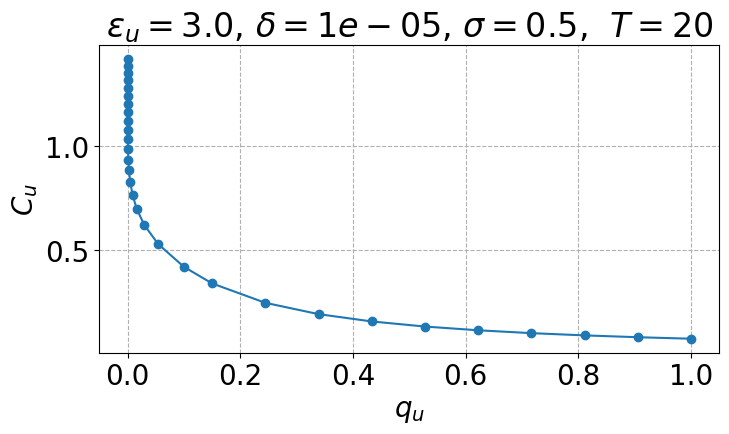

In [2]:
# Figure of q_c_pair.png
epsilon_u = 3.0
n_total_round = 20
delta = 1e-5
sigma = 0.5
x, y = make_q_c_curve(epsilon_u=epsilon_u, delta=delta, sigma=sigma, num_points=30, n_total_round=n_total_round, min=-6)
plot_q_c_curve(
    x, y,
    title=r"$\epsilon_u={}$, $\delta={}$, $\sigma={}$,  $T={}$".format(
                epsilon_u, delta, sigma, n_total_round,
            )
)

In [ ]:
# Figure of q_c_pair.png
epsilon_u = 3.0
n_total_round = 20
delta = 1e-5
sigma = 0.5
x, y = make_q_c_curve(epsilon_u=epsilon_u, delta=delta, sigma=sigma, num_points=30, n_total_round=n_total_round, min=-6)
plot_q_c_curve(
    x, y,
    title=r"$\epsilon_u={}$, $\delta={}$, $\sigma={}$,  $T={}$".format(
                epsilon_u, delta, sigma, n_total_round,
            ), is_qC=True,
)

# PULDP-AVG

## Offline HPO

### HeartDisease

#### Parameters

#### Test with all of HPs for showing group-independency (Figure in Appendix)

Basic setting 

(This setup is close to the real world, and each group has a different number of users and different privacy budgets, so the optimal HP is likely to be different.)

- (eps1, eps2, eps3) = (0.15, 3.0, 5.0)
- with ratio (eps1, eps2, eps3) = (0.6, 0.25, 0.15)

static_optimization_512c3287df2caba17fe9c88a29f33379.pkl
Skip: File already exists.
Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/static_optimization_result-top20-group0-heart_disease-all.png


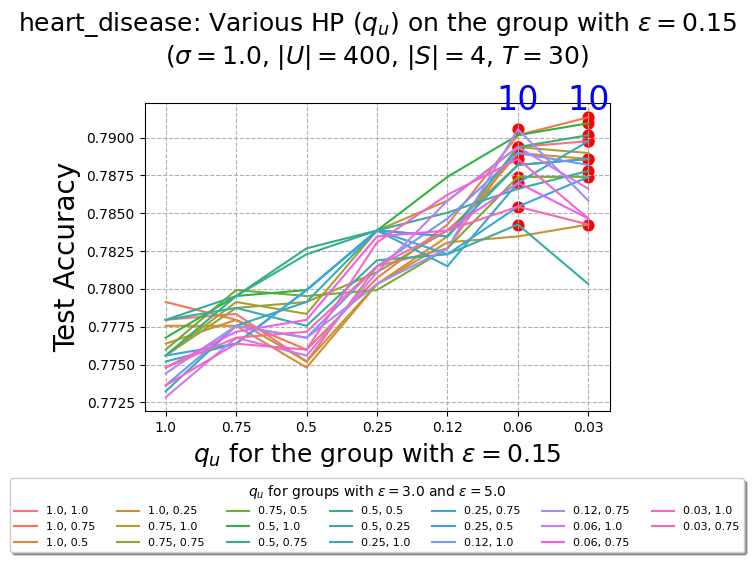

Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/static_optimization_result-top20-group1-heart_disease-all.png


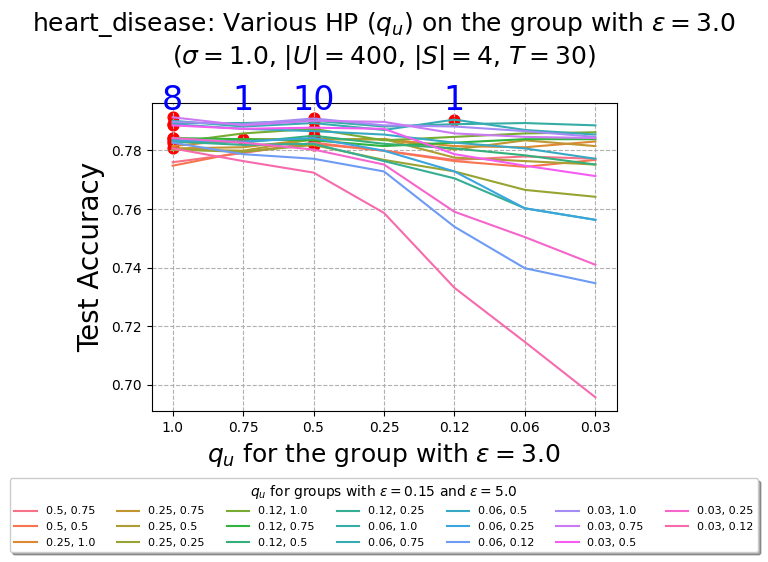

Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/static_optimization_result-top20-group2-heart_disease-all.png


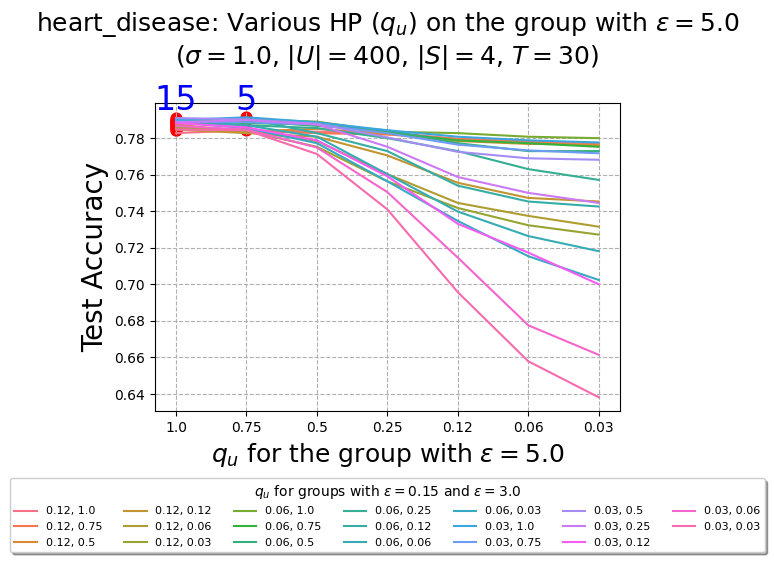

min_idx = {0.15: 4, 3.0: 0, 5.0: 0}, min_loss = 0.47097815573215485


In [2]:
logger_set_warning()
fed_sim_params = init_heart_disease_param(eps_u=0.5, parallelized=True)
fed_sim_params.epsilon_list = [0.15, 3.0, 5.0]
fed_sim_params.group_thresholds = [0.15, 3.0, 5.0]
fed_sim_params.ratio_list = [0.6, 0.25, 0.15]
fed_sim_params.n_total_round = 30
fed_sim_params.times = 10
static_q_u_list = [1.0, 0.75, 0.5, 0.25, 0.12, 0.06, 0.03]

idx_per_group_list = prepare_grid_search(fed_sim_params.get_group_eps_set(), start_idx=0, end_idx=7)
static_optimization(fed_sim_params, idx_per_group_list, static_q_u_list=static_q_u_list, force_update=False)
min_idx, min_loss = show_static_optimization_result(
    fed_sim_params, idx_per_group_list, static_q_u_list=static_q_u_list,
    img_name=f"heart_disease-all", is_3d=True
)
print(f"min_idx = {min_idx}, min_loss = {min_loss}")

#### Various n_users with a single eps group (Fig in Sec4)

static_optimization_87b7fbed9ba9c197962dbb31bf80a216.pkl
Skip: File already exists.
Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/static_optimization_result-1d-heart_disease-users-50.png


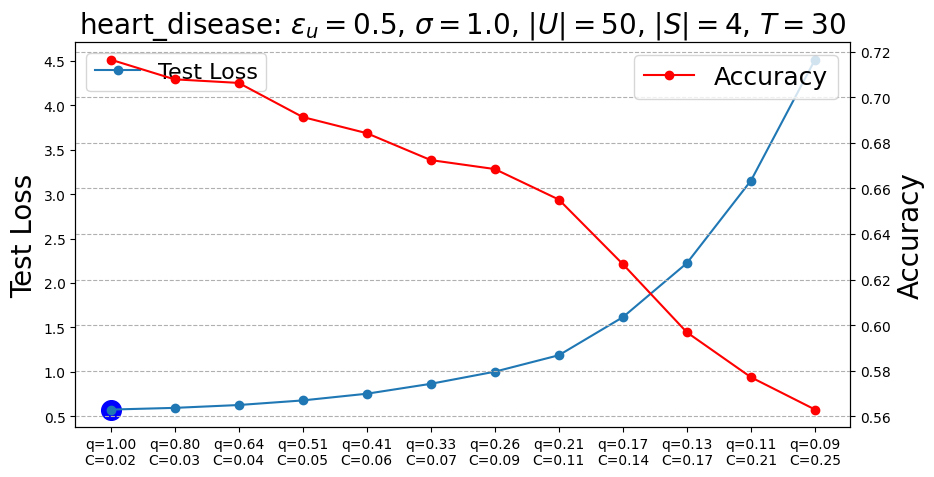

{0.5: 0} 0.5754557847976685
static_optimization_14477d9a45397c3b08e71ecb3d03625c.pkl
Skip: File already exists.
Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/static_optimization_result-1d-heart_disease-users-100.png


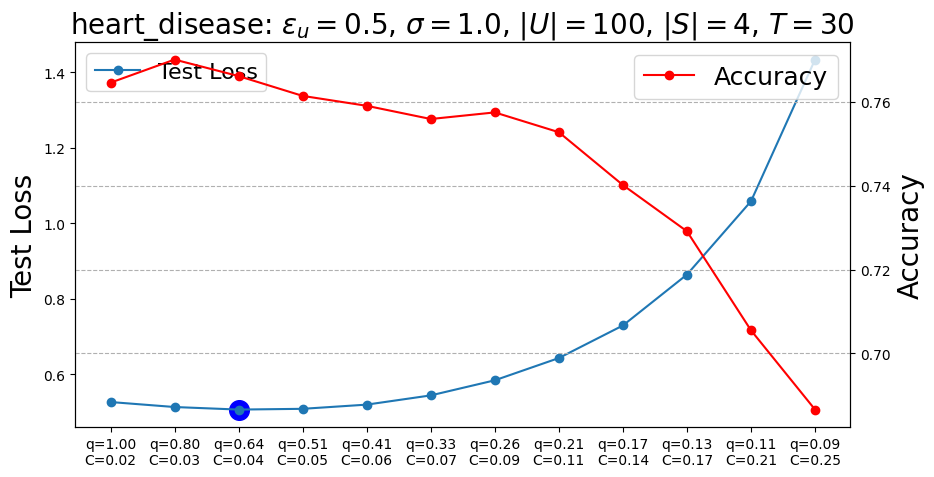

{0.5: 2} 0.5067352712154388
static_optimization_a46309365ea1e7cf84b2975d202627e1.pkl
Skip: File already exists.
Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/static_optimization_result-1d-heart_disease-users-200.png


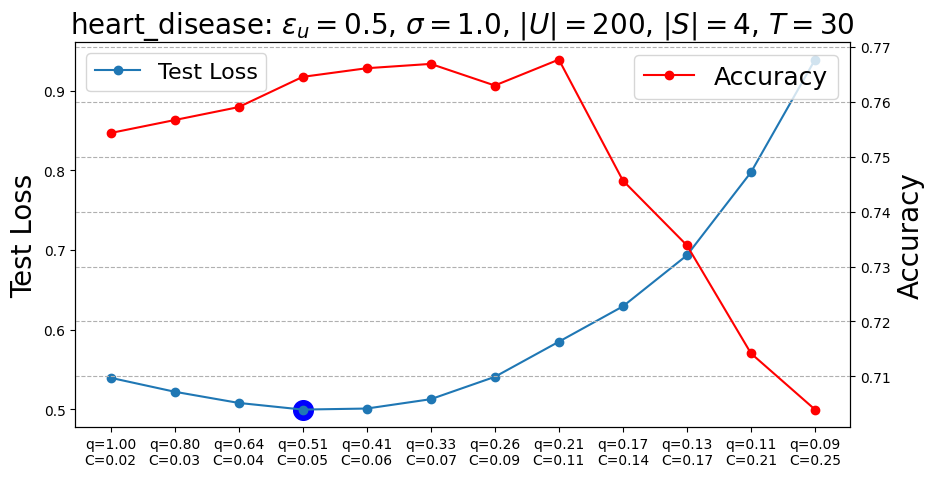

{0.5: 3} 0.49974275231361387
static_optimization_bde3ba968951a02ae63614064cf75982.pkl
Skip: File already exists.
Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/static_optimization_result-1d-heart_disease-users-400.png


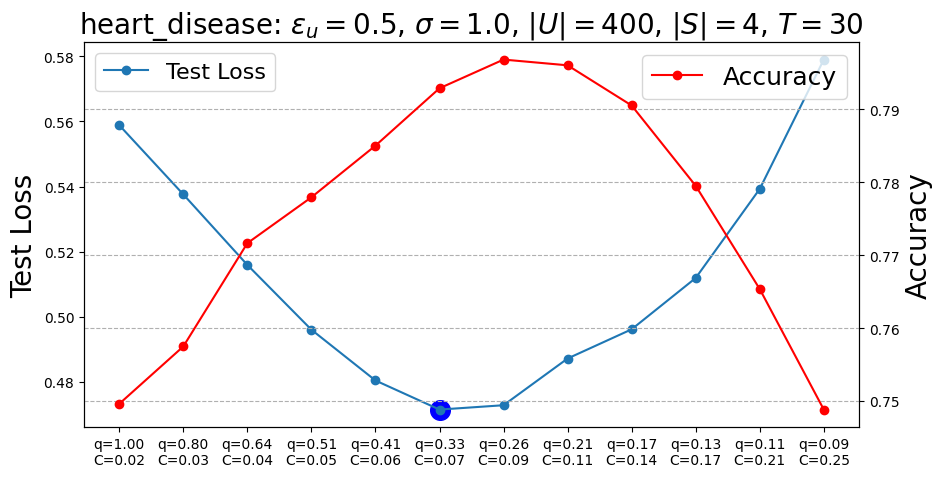

{0.5: 5} 0.4715360403060913


In [7]:
logger_set_warning()
fed_sim_params = init_heart_disease_param(eps_u=0.5, parallelized=True)

for n_users in [50, 100, 200, 400]:
    fed_sim_params.n_users = n_users
    idx_per_group_list = prepare_grid_search(fed_sim_params.get_group_eps_set(), start_idx=0, end_idx=12)
    static_optimization(fed_sim_params, idx_per_group_list, static_q_u_list=None, force_update=False)
    min_idx, min_loss = show_static_optimization_result(
        fed_sim_params, idx_per_group_list, 
        img_name=f"heart_disease-users-{n_users}"
    )
    print(min_idx, min_loss)

static_optimization_71c841d2203378db478b30ba21f668a2.pkl
Skip: File already exists.
Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/static_optimization_result-1d-heart_disease-users-50.png


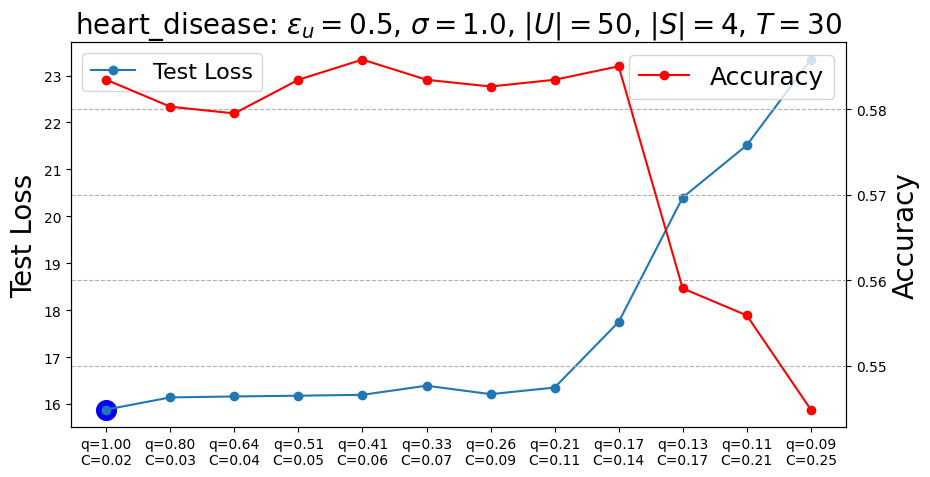

{0.5: 0} 15.881447410583496
static_optimization_d92b4c632bd8304fc3171cc6ef8887a6.pkl
Skip: File already exists.
Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/static_optimization_result-1d-heart_disease-users-100.png


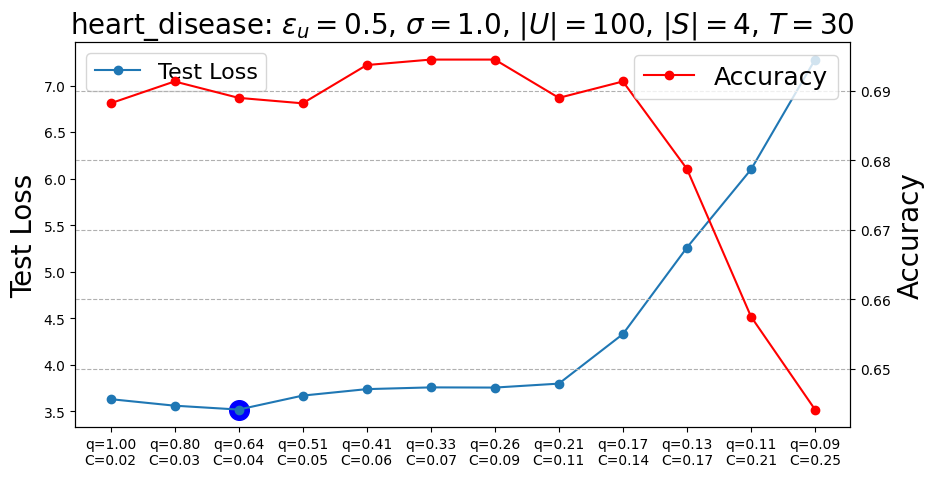

{0.5: 2} 3.51794490814209
static_optimization_def8410cacb7e717fa0d17f524edd144.pkl
IDX:  {0.5: 0}
======== TIME: 0 start


KeyboardInterrupt: 

In [ ]:
logger_set_warning()
fed_sim_params = init_heart_disease_param(
    eps_u=0.5, parallelized=True, dynamic_global_learning_rate=True,
)

for n_users in [50, 100, 200, 400]:
    fed_sim_params.n_users = n_users
    idx_per_group_list = prepare_grid_search(fed_sim_params.get_group_eps_set(), start_idx=0, end_idx=12)
    static_optimization(fed_sim_params, idx_per_group_list, static_q_u_list=None, force_update=False)
    min_idx, min_loss = show_static_optimization_result(
        fed_sim_params, idx_per_group_list, 
        img_name=f"heart_disease-users-{n_users}"
    )
    print(min_idx, min_loss)

#### Various eps_u with a single eps group (Fig in Sec4)

static_optimization_b029f4bf62e77a7c7c5e3c6b0e32dcc4.pkl
Skip: File already exists.
Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/static_optimization_result-1d-heart_disease-uniform-eps-0.15.png


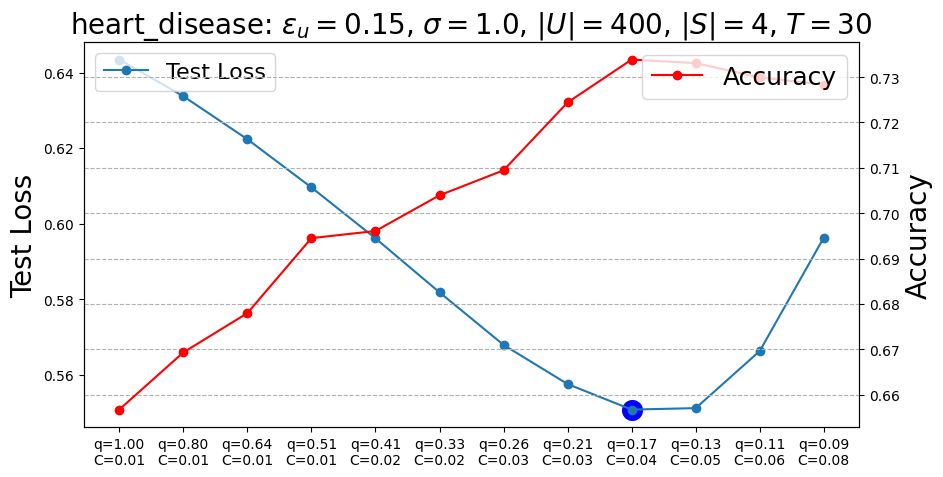

{0.15: 8} 0.5507778882980346
static_optimization_bde3ba968951a02ae63614064cf75982.pkl
Skip: File already exists.
Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/static_optimization_result-1d-heart_disease-uniform-eps-0.5.png


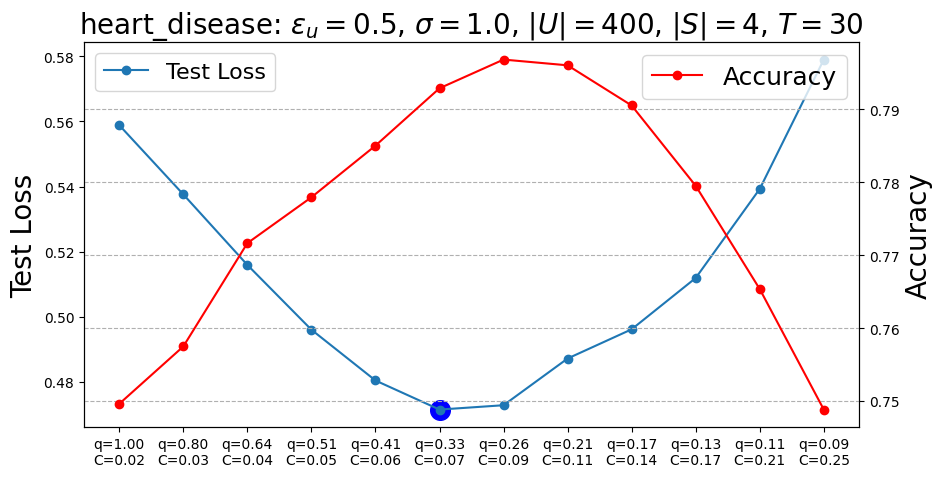

{0.5: 5} 0.4715360403060913
static_optimization_29d463ef4f8a6ae989a6c6917f239da8.pkl
Skip: File already exists.
Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/static_optimization_result-1d-heart_disease-uniform-eps-1.0.png


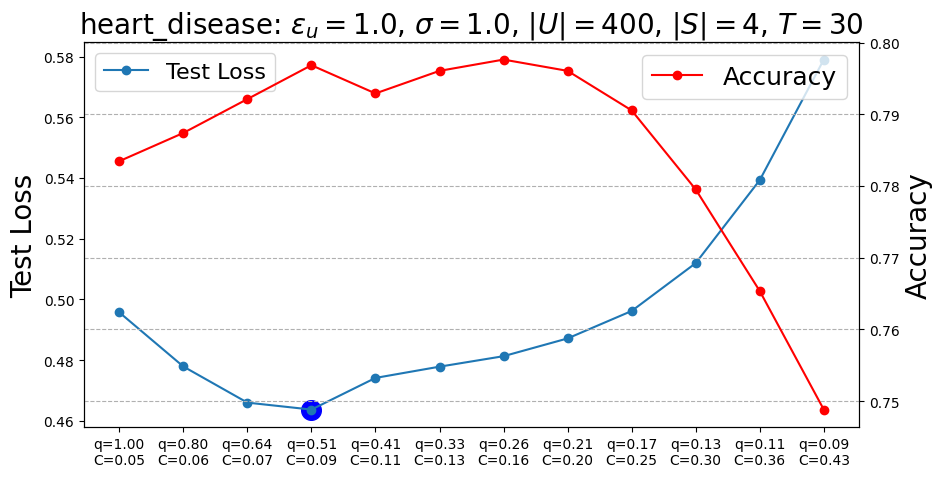

{1.0: 3} 0.46369879245758056
static_optimization_597b4688d14518f11bcadab088eb6edf.pkl
Skip: File already exists.
Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/static_optimization_result-1d-heart_disease-uniform-eps-5.0.png


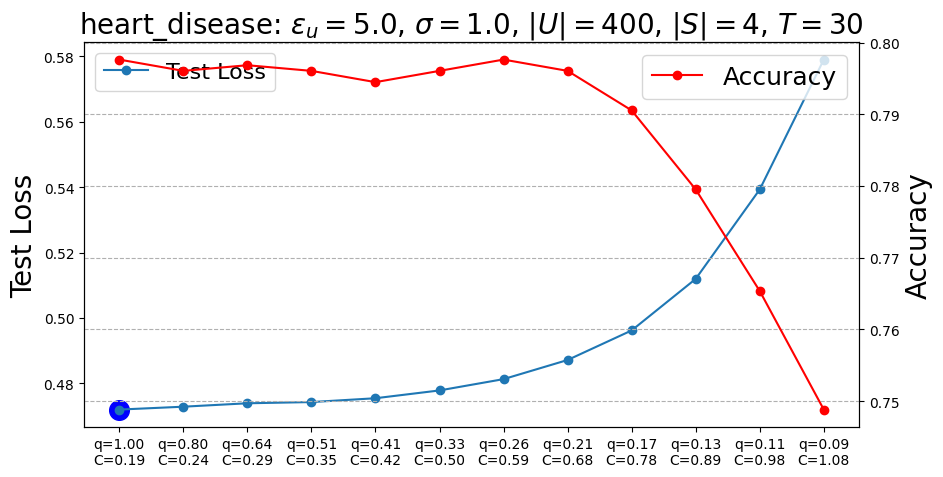

{5.0: 0} 0.4719789981842041


In [8]:
for eps_u in [0.15, 0.5, 1.0, 5.0]:
    fed_sim_params = init_heart_disease_param(eps_u=eps_u, parallelized=True)
    idx_per_group_list = prepare_grid_search(fed_sim_params.get_group_eps_set(), start_idx=0, end_idx=12)
    static_optimization(fed_sim_params, idx_per_group_list, static_q_u_list=None, force_update=False)
    min_idx, min_loss = show_static_optimization_result(
        fed_sim_params, idx_per_group_list, 
        img_name=f"heart_disease-uniform-eps-{eps_u}"
    )
    print(min_idx, min_loss)

#### for ULDP-AVG

static_optimization_0ef2f435b49ae1a3b9211a5155506065.pkl
Skip: File already exists.
Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/static_optimization_result-1d-heart_disease-uldpavg.png


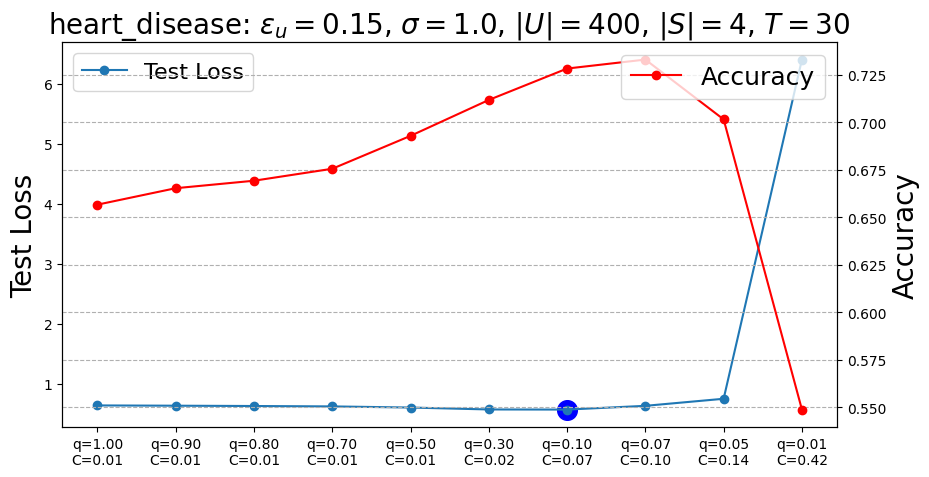

min_idx = {0.15: 6}, min_loss = 0.5743536829948426


In [10]:
static_q_u_list = [1.0, 0.9, 0.8, 0.7, 0.5, 0.3, 0.1, 0.07, 0.05, 0.01]
fed_sim_params = init_heart_disease_param(eps_u=0.15, parallelized=True)
idx_per_group_list = prepare_grid_search(fed_sim_params.get_group_eps_set(), start_idx=0, end_idx=10)
static_optimization(fed_sim_params, idx_per_group_list, static_q_u_list=static_q_u_list, force_update=False)
min_idx, min_loss = show_static_optimization_result(
    fed_sim_params, idx_per_group_list, 
    static_q_u_list=static_q_u_list,
    img_name=f"{fed_sim_params.dataset_name}-uldpavg",
)
print(f"min_idx = {min_idx}, min_loss = {min_loss}")

### MNIST

static_optimization_1c457b434e709a1dd202f17909ec772e.pkl
Skip: File already exists.
Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/static_optimization_result-1d-mnist-all.png


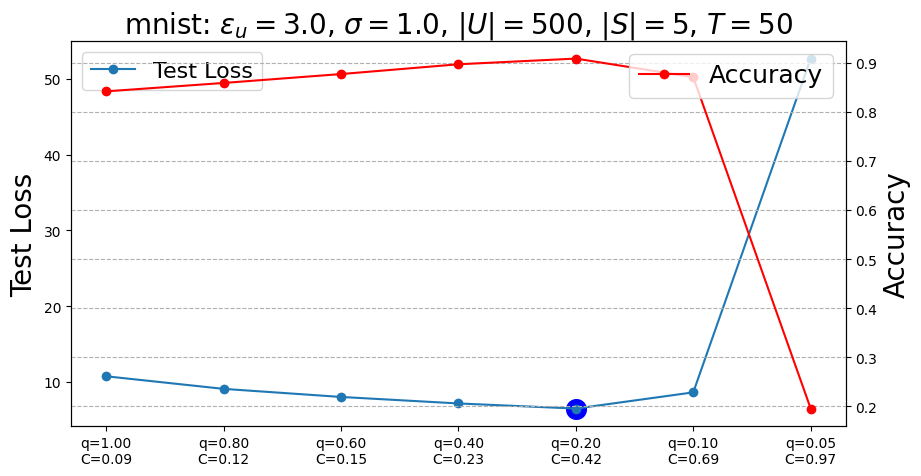

min_idx = {3.0: 4}, min_loss = 6.498760849237442


In [5]:
# static_optimization_dcc96be578cebd23679e769b9b12cc7b.pkl
logger_set_info()
static_q_u_list = [1.0, 0.8, 0.6, 0.4, 0.2, 0.1, 0.05]
fed_sim_params = init_mnist_param(
    n_users=500, eps_u=3.0, times=2,
    gpu_id=0, parallelized="strong")
idx_per_group_list = prepare_grid_search(
    fed_sim_params.get_group_eps_set(), 
    start_idx=0, end_idx=7
)
static_optimization(fed_sim_params, idx_per_group_list, static_q_u_list=static_q_u_list, force_update=False)
min_idx, min_loss = show_static_optimization_result(
    fed_sim_params, idx_per_group_list, static_q_u_list=static_q_u_list,
    img_name=f"mnist-all"
)
print(f"min_idx = {min_idx}, min_loss = {min_loss}")

## Online HPO

### HeartDisease

#### QCTest

##### different initial q_u

Skip: File already exists.
Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-heart_disease-PULDP-AVG-QCTest-0.1.png


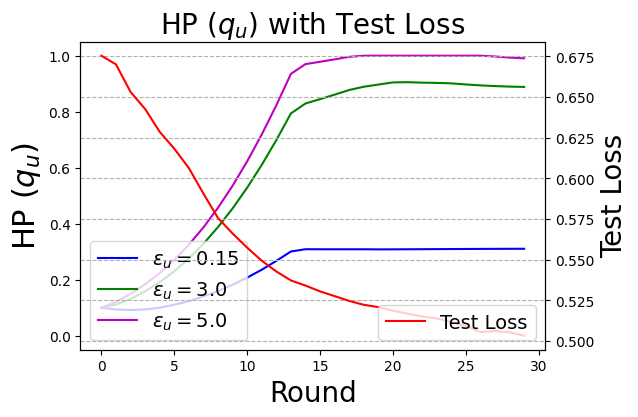

Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-losses-heart_disease-PULDP-AVG-QCTest-0.1.png


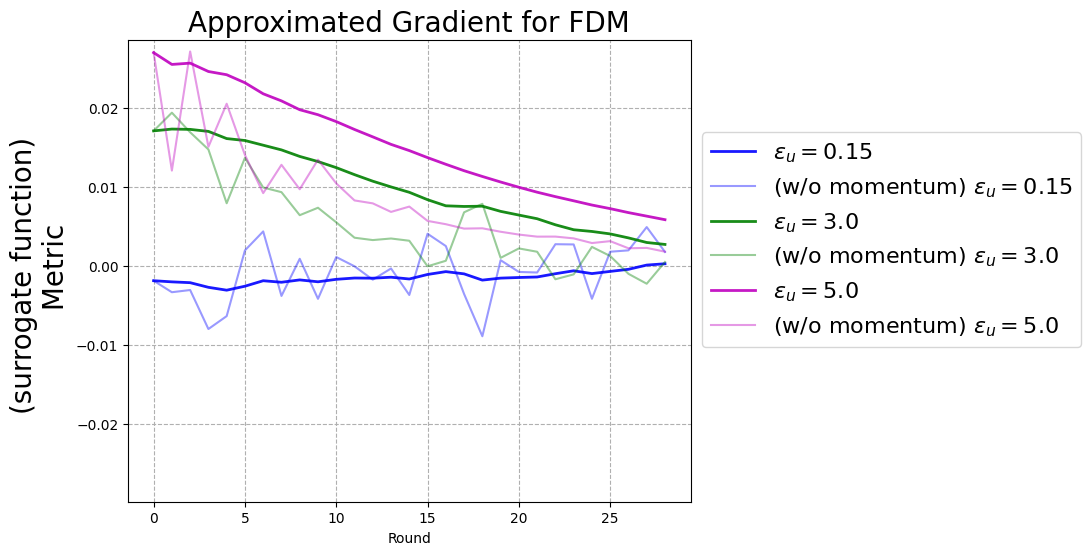

Skip: File already exists.
Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-heart_disease-PULDP-AVG-QCTest-0.5.png


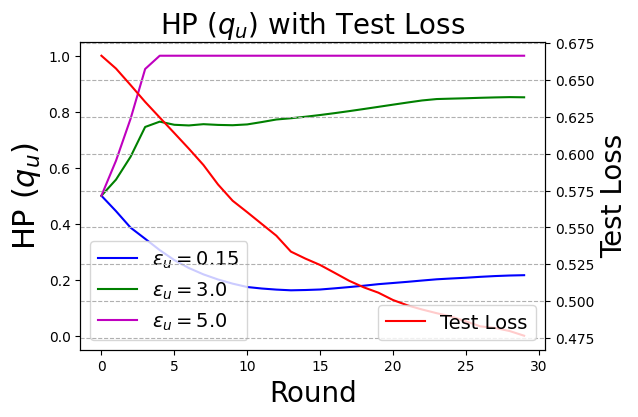

Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-losses-heart_disease-PULDP-AVG-QCTest-0.5.png


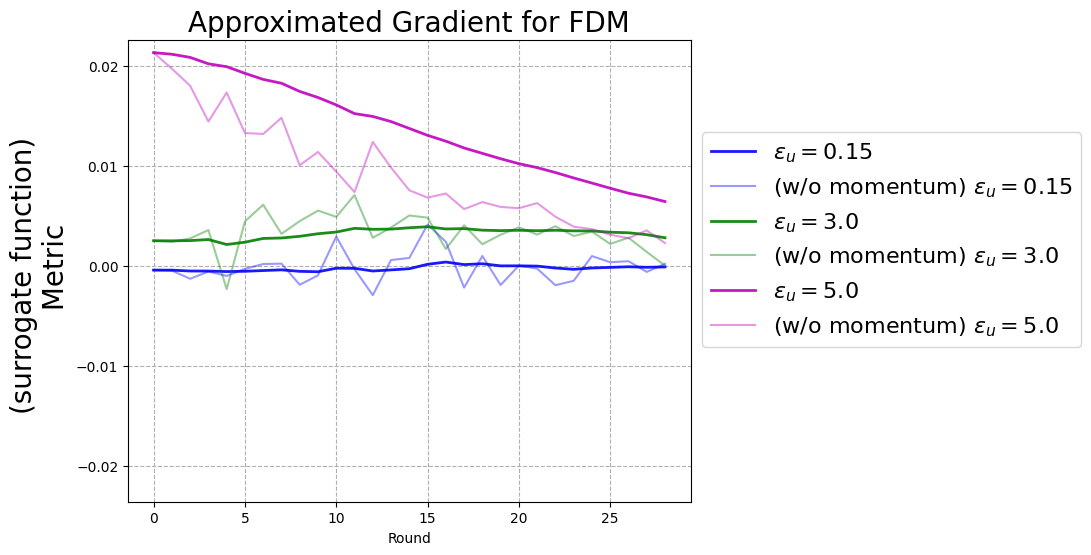

Skip: File already exists.
Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-heart_disease-PULDP-AVG-QCTest-1.0.png


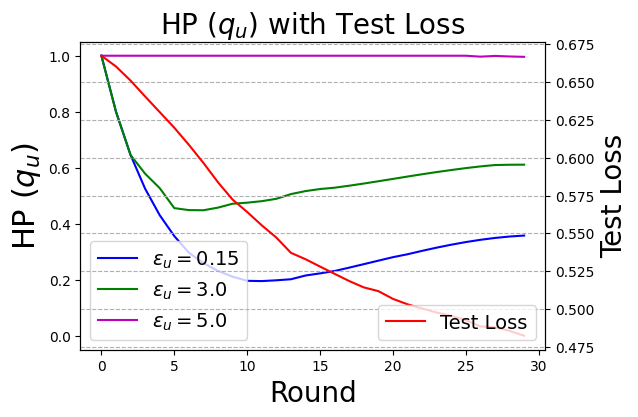

Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-losses-heart_disease-PULDP-AVG-QCTest-1.0.png


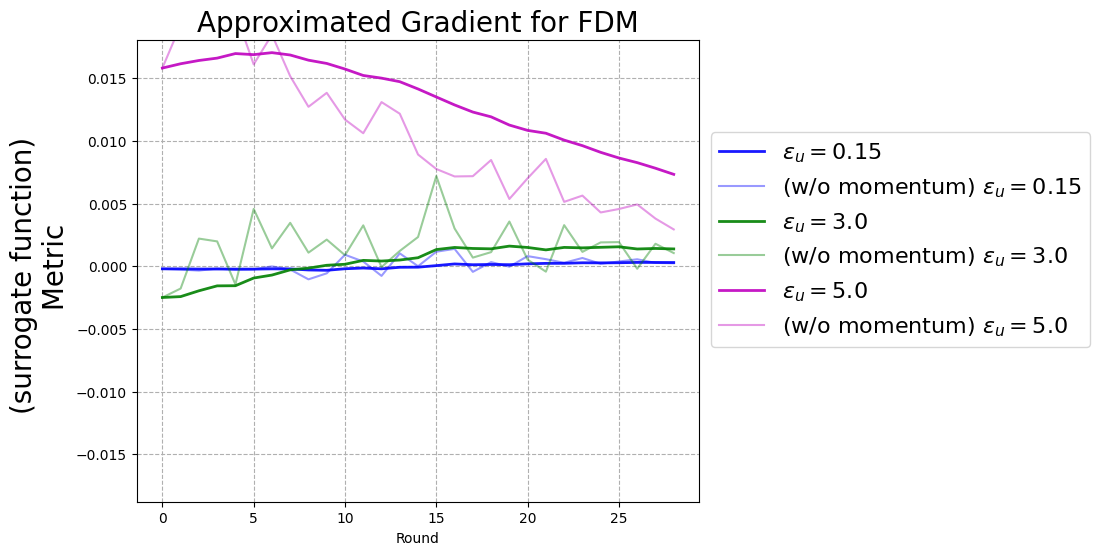

In [11]:
if "hd_all_acc_results" not in locals():
    hd_all_acc_results = {}
logger_set_warning()
fed_sim_params = init_heart_disease_param(parallelized=True)
fed_sim_params.epsilon_list = [0.15, 3.0, 5.0]
fed_sim_params.group_thresholds = [0.15, 3.0, 5.0]
fed_sim_params.ratio_list = [0.6, 0.25, 0.15]
fed_sim_params.validation_ratio = 0.5
fed_sim_params.times = 10
fed_sim_params.agg_strategy = "PULDP-AVG-QCTest"

initial_q_u_list = [0.1, 0.5, 1.0]
for initial_q_u in initial_q_u_list:
    fed_sim_params.initial_q_u = initial_q_u
    run_online_optimization(fed_sim_params, force_update=False)
    x, acc_means, acc_stds = show_online_optimization_result(
        fed_sim_params, errorbar=False,
        img_name=f"{fed_sim_params.dataset_name}-{fed_sim_params.agg_strategy}-{initial_q_u}"
    )
    hd_all_acc_results[(fed_sim_params.agg_strategy, initial_q_u)] = (x, acc_means, acc_stds)


##### different (bigger) step size

Skip: File already exists.
Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-heart_disease-PULDP-AVG-QCTest-0.1-q_step_size0.3.png


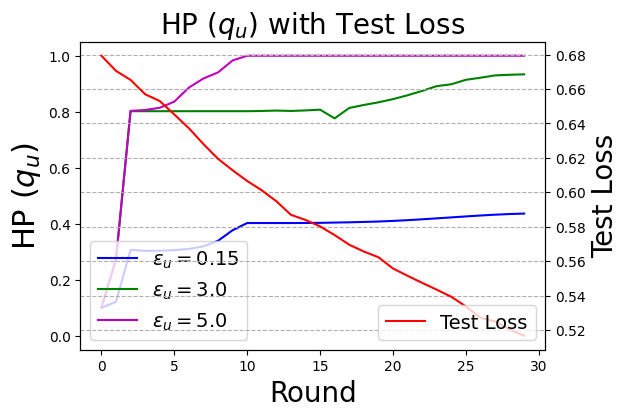

Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-losses-heart_disease-PULDP-AVG-QCTest-0.1-q_step_size0.3.png


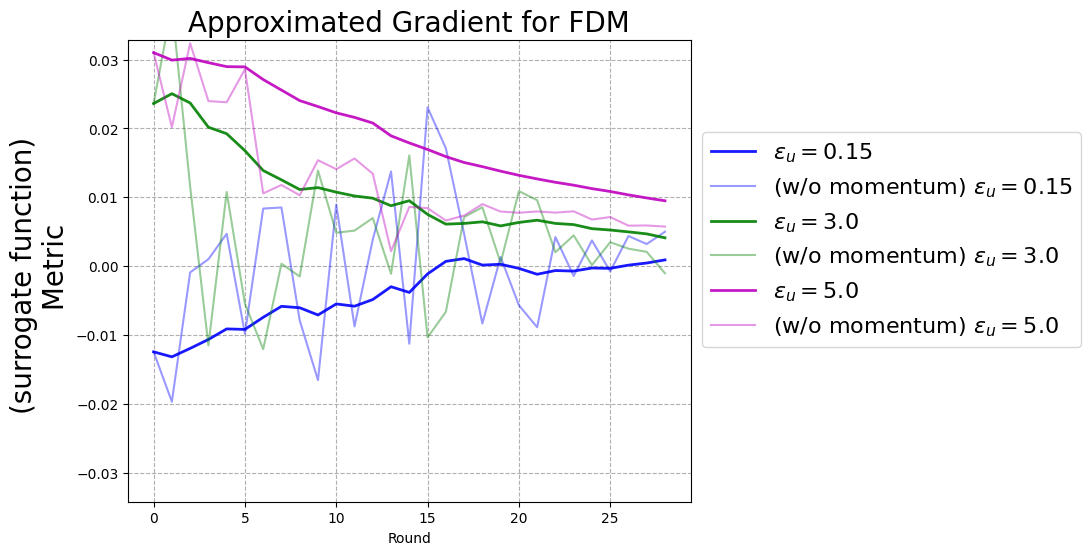

Skip: File already exists.
Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-heart_disease-PULDP-AVG-QCTest-0.1-q_step_size0.5.png


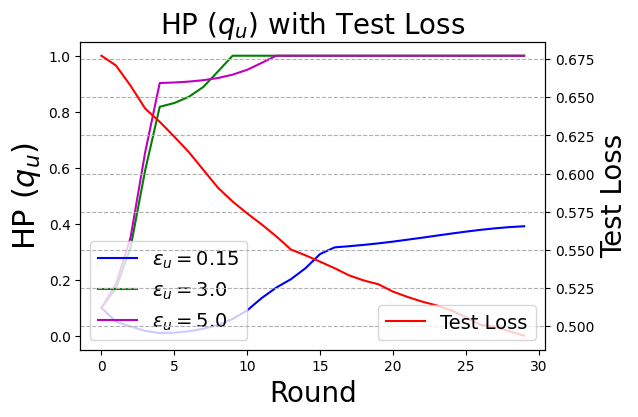

Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-losses-heart_disease-PULDP-AVG-QCTest-0.1-q_step_size0.5.png


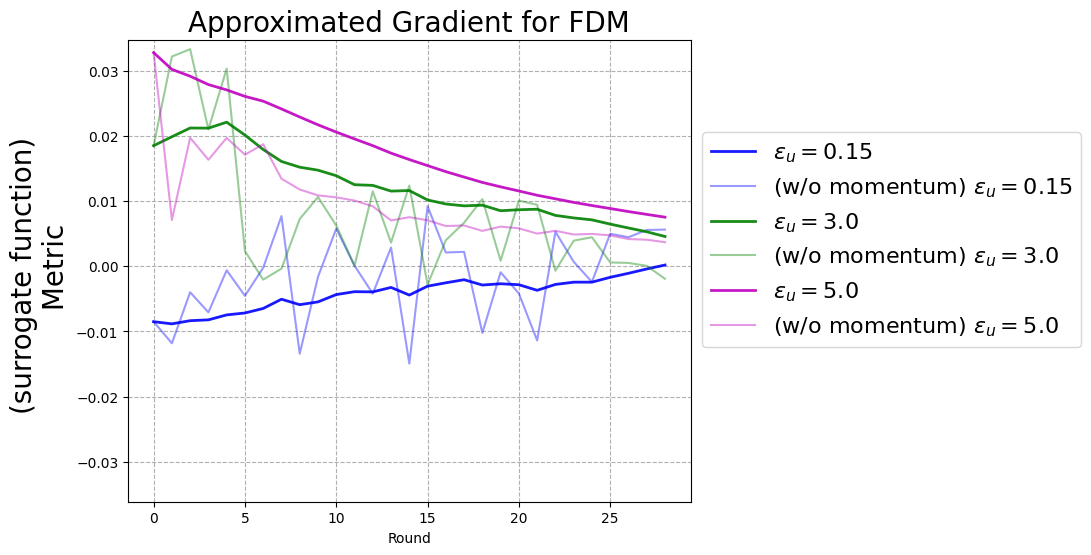

Skip: File already exists.
Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-heart_disease-PULDP-AVG-QCTest-0.1-q_step_size1.0.png


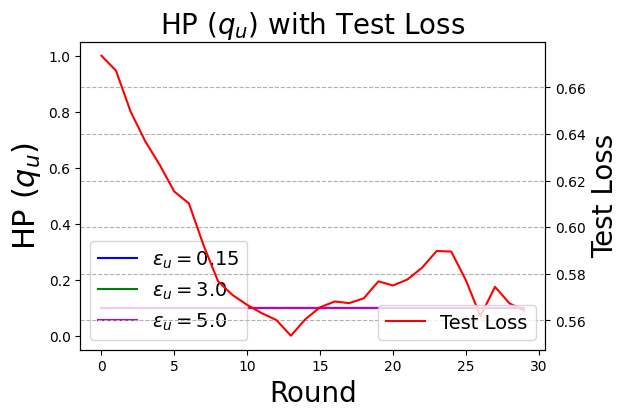

Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-losses-heart_disease-PULDP-AVG-QCTest-0.1-q_step_size1.0.png


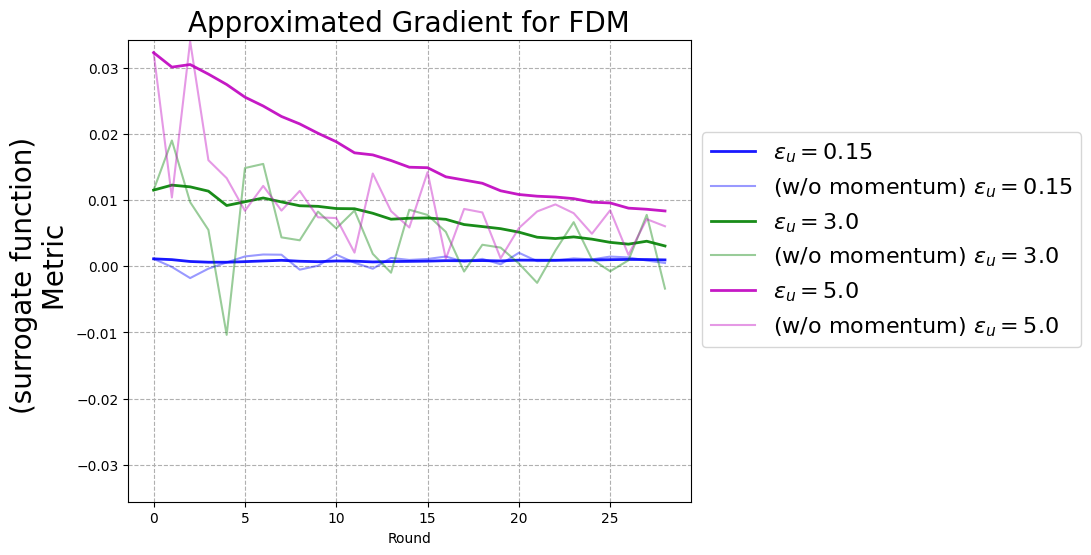

Skip: File already exists.
Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-heart_disease-PULDP-AVG-QCTest-0.5-q_step_size0.3.png


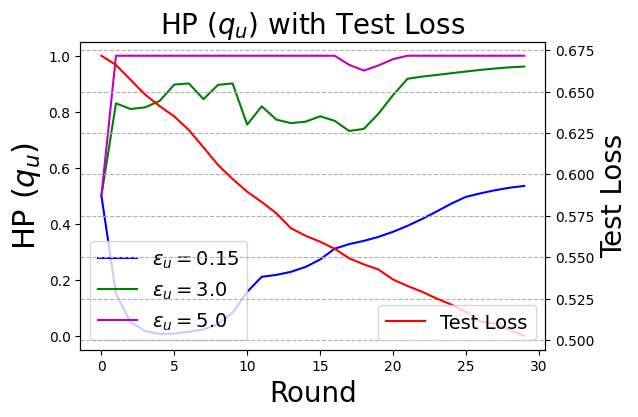

Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-losses-heart_disease-PULDP-AVG-QCTest-0.5-q_step_size0.3.png


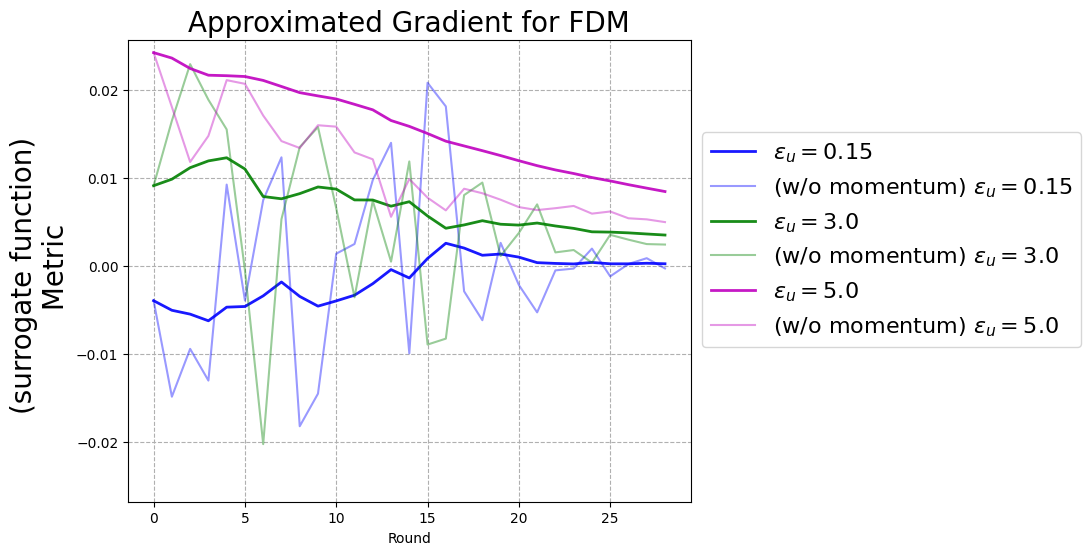

Skip: File already exists.
Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-heart_disease-PULDP-AVG-QCTest-0.5-q_step_size0.5.png


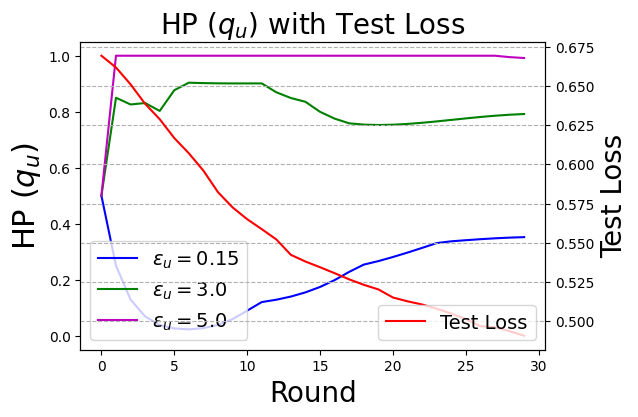

Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-losses-heart_disease-PULDP-AVG-QCTest-0.5-q_step_size0.5.png


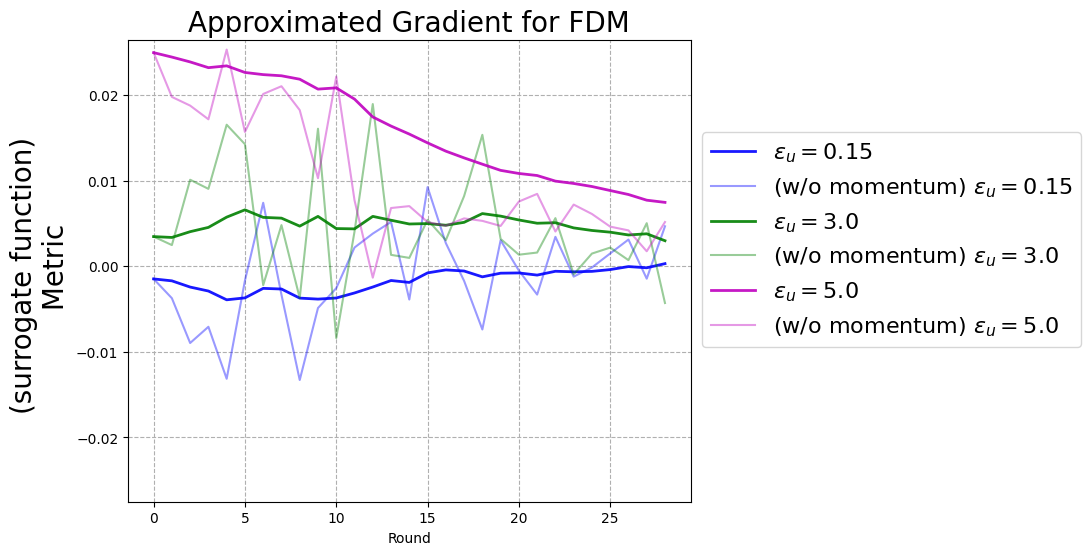

======== TIME: 0 start
======== TIME: 1 start
======== TIME: 2 start


Process Process-15:
Traceback (most recent call last):
  File "/Users/fumiyuki/.pyenv/versions/3.9.2/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/fumiyuki/.pyenv/versions/3.9.2/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/fumiyuki/research/AcSilo/acsilo/src/parallelized_local_trainer.py", line 35, in parallelized_train_worker
    (
ValueError: not enough values to unpack (expected 34, got 33)
Process Process-16:
Traceback (most recent call last):
  File "/Users/fumiyuki/.pyenv/versions/3.9.2/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/fumiyuki/.pyenv/versions/3.9.2/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/fumiyuki/research/AcSilo/acsilo/src/parallelized_local_trainer.py", line 35, in parallelized_train_worker
    (
ValueError: no

In [20]:
logger_set_warning()
fed_sim_params = init_heart_disease_param(parallelized=True)
fed_sim_params.epsilon_list = [0.15, 3.0, 5.0]
fed_sim_params.group_thresholds = [0.15, 3.0, 5.0]
fed_sim_params.ratio_list = [0.6, 0.25, 0.15]
fed_sim_params.validation_ratio = 0.5
fed_sim_params.times = 10
fed_sim_params.agg_strategy = "PULDP-AVG-QCTest"

initial_q_u_list = [0.1, 0.5, 1.0]
q_step_size_list = [0.3, 0.5, 1.0]
for initial_q_u in initial_q_u_list:
    for q_step_size in q_step_size_list:
        fed_sim_params.initial_q_u = initial_q_u
        fed_sim_params.q_step_size = q_step_size
        run_online_optimization(fed_sim_params, force_update=False)
        x, acc_means, acc_stds = show_online_optimization_result(
            fed_sim_params, errorbar=False,
            img_name=f"{fed_sim_params.dataset_name}-{fed_sim_params.agg_strategy}-{initial_q_u}-q_step_size{q_step_size}"
        )

##### different momentum_weight

Skip: File already exists.
Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-heart_disease-PULDP-AVG-QCTest-0.1-momentum0.5.png


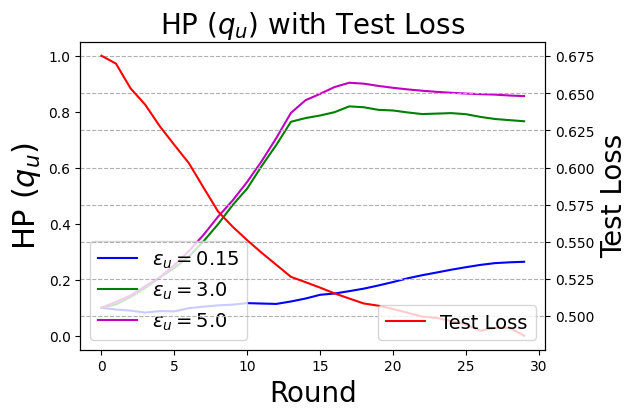

Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-losses-heart_disease-PULDP-AVG-QCTest-0.1-momentum0.5.png


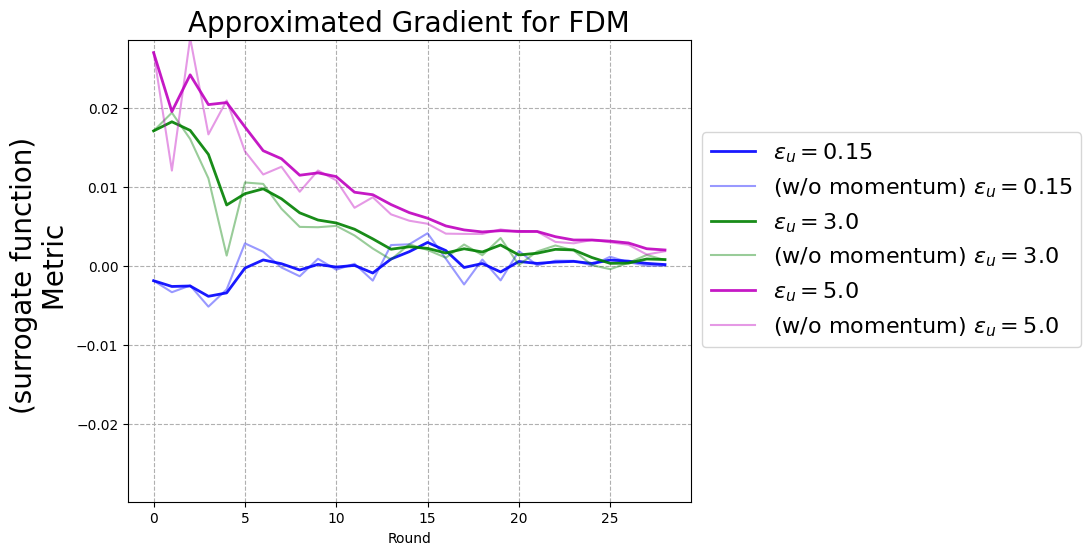

Skip: File already exists.
Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-heart_disease-PULDP-AVG-QCTest-0.1-momentum0.9.png


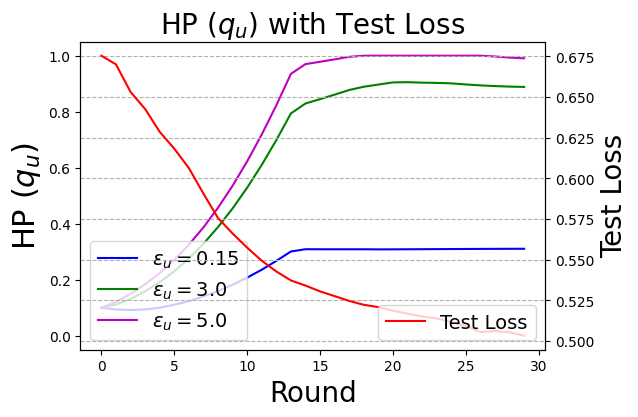

Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-losses-heart_disease-PULDP-AVG-QCTest-0.1-momentum0.9.png


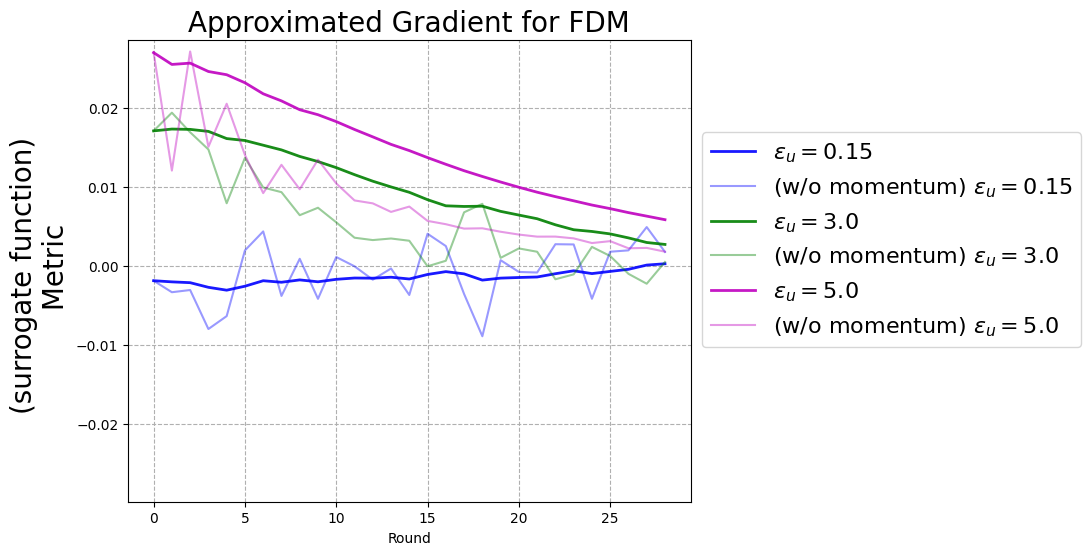

Skip: File already exists.
Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-heart_disease-PULDP-AVG-QCTest-0.5-momentum0.5.png


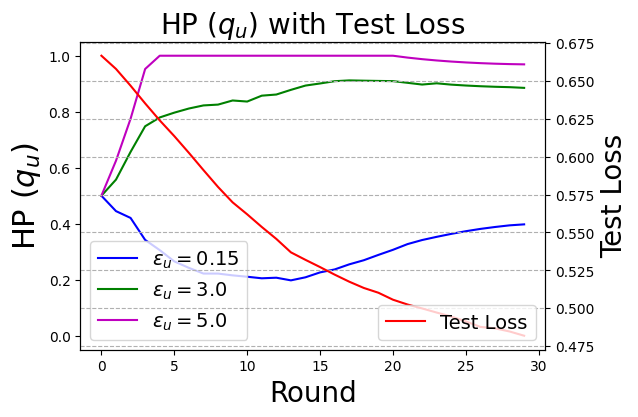

Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-losses-heart_disease-PULDP-AVG-QCTest-0.5-momentum0.5.png


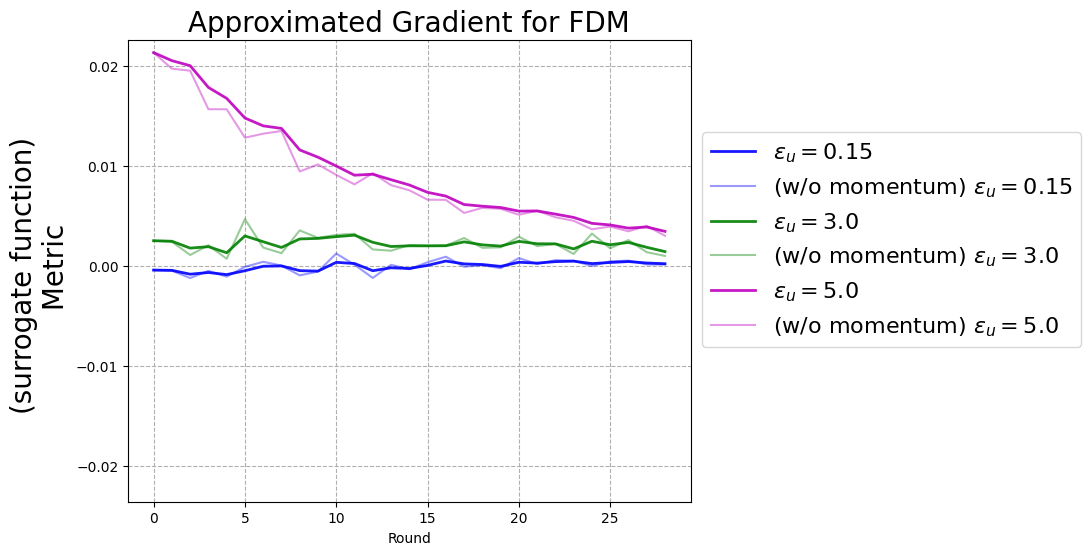

Skip: File already exists.
Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-heart_disease-PULDP-AVG-QCTest-0.5-momentum0.9.png


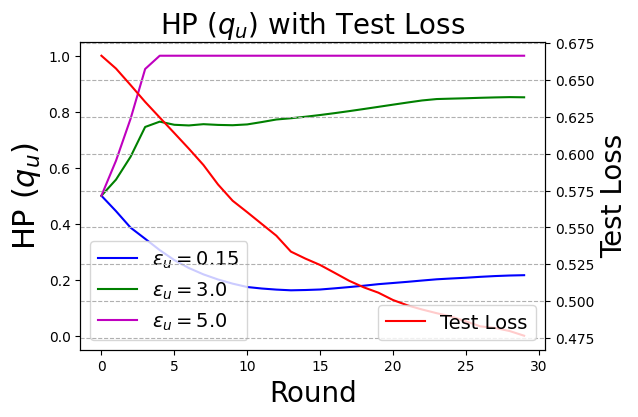

Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-losses-heart_disease-PULDP-AVG-QCTest-0.5-momentum0.9.png


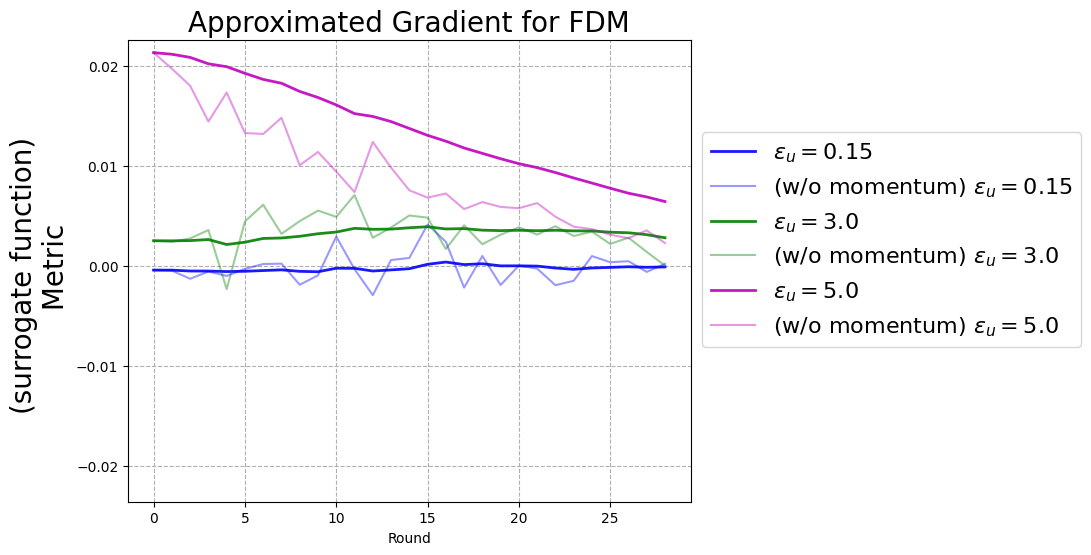

Skip: File already exists.
Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-heart_disease-PULDP-AVG-QCTest-1.0-momentum0.5.png


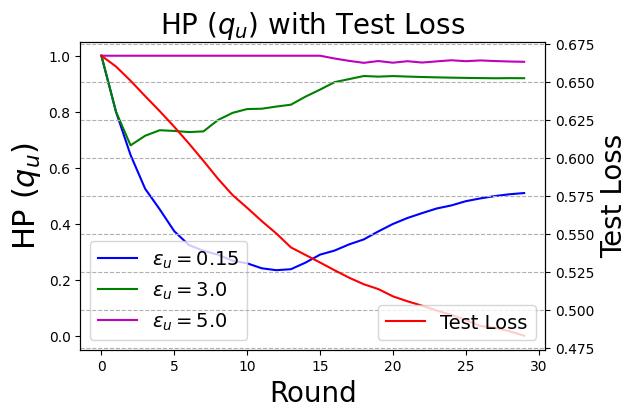

Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-losses-heart_disease-PULDP-AVG-QCTest-1.0-momentum0.5.png


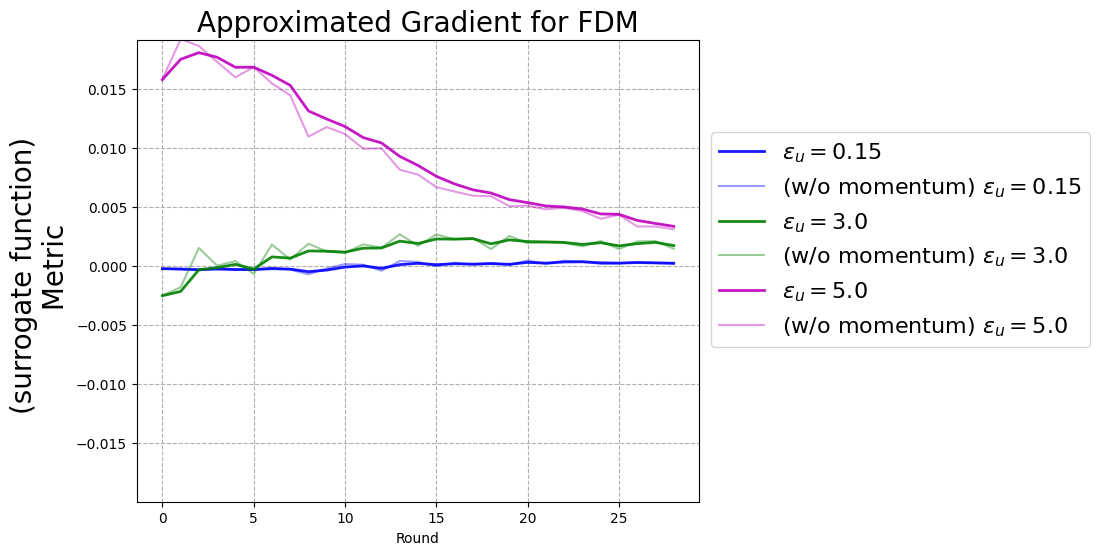

Skip: File already exists.
Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-heart_disease-PULDP-AVG-QCTest-1.0-momentum0.9.png


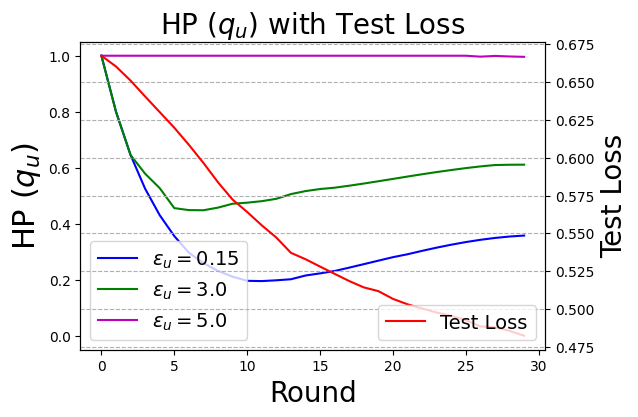

Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-losses-heart_disease-PULDP-AVG-QCTest-1.0-momentum0.9.png


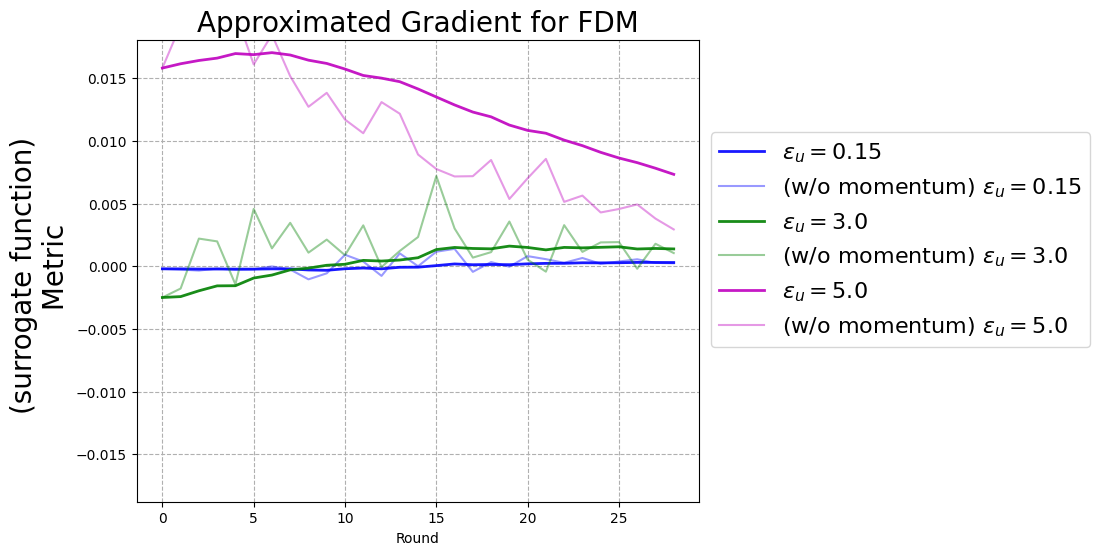

In [12]:
logger_set_warning()
fed_sim_params = init_heart_disease_param(parallelized=True)
fed_sim_params.epsilon_list = [0.15, 3.0, 5.0]
fed_sim_params.group_thresholds = [0.15, 3.0, 5.0]
fed_sim_params.ratio_list = [0.6, 0.25, 0.15]
fed_sim_params.validation_ratio = 0.5
fed_sim_params.times = 10
fed_sim_params.agg_strategy = "PULDP-AVG-QCTest"

initial_q_u_list = [0.1, 0.5, 1.0]
momentum_weight_list = [0.5, 0.9]
for initial_q_u in initial_q_u_list:
    for momentum_weight in momentum_weight_list:
        fed_sim_params.initial_q_u = initial_q_u
        fed_sim_params.momentum_weight = momentum_weight
        run_online_optimization(fed_sim_params, force_update=False)
        x, acc_means, acc_stds = show_online_optimization_result(
            fed_sim_params, errorbar=False,
            img_name=f"{fed_sim_params.dataset_name}-{fed_sim_params.agg_strategy}-{initial_q_u}-momentum{momentum_weight}"
        )

#### QCTrain

##### different initial q_u

Skip: File already exists.
Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-heart_disease-PULDP-AVG-QCTrain-0.1.png


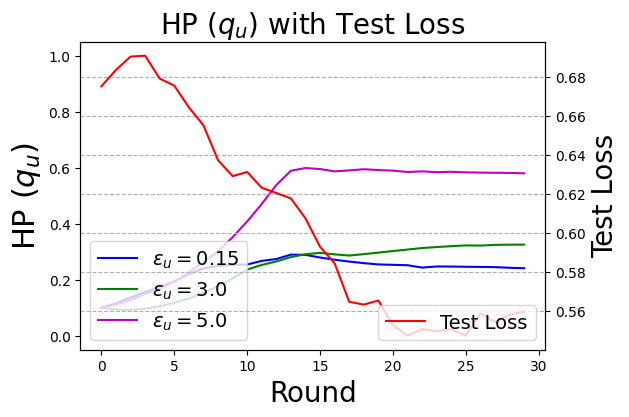

Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-losses-heart_disease-PULDP-AVG-QCTrain-0.1.png


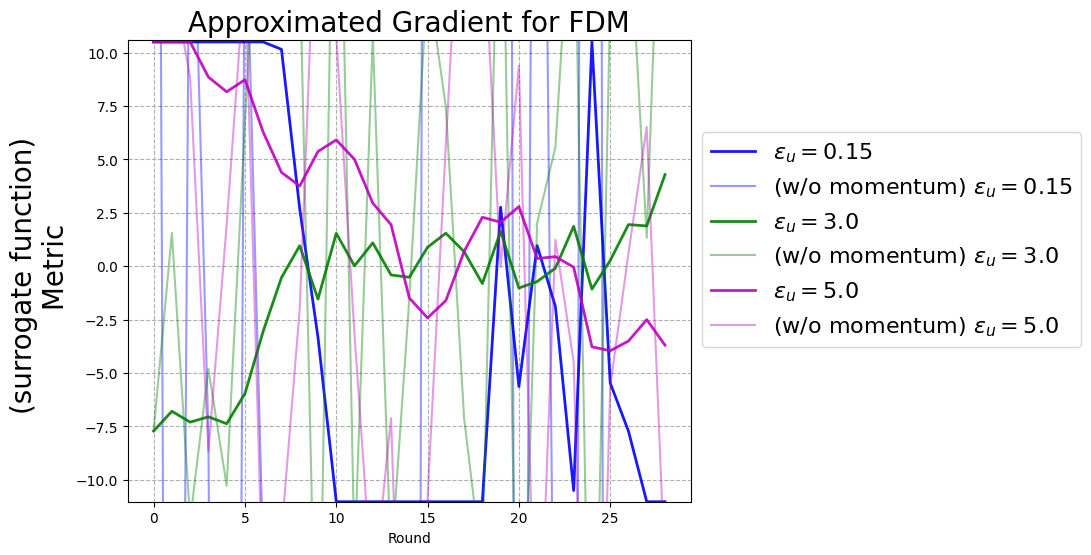

Skip: File already exists.
Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-heart_disease-PULDP-AVG-QCTrain-0.5.png


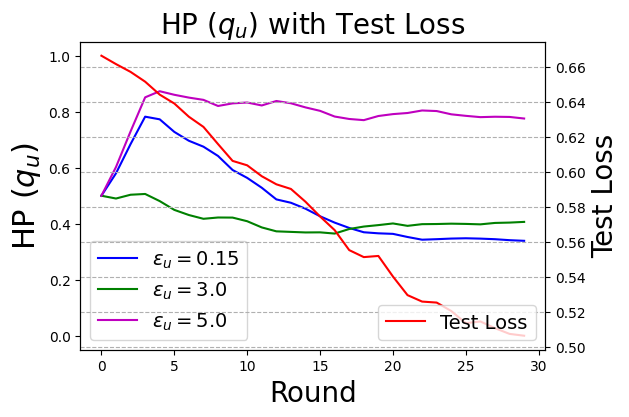

Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-losses-heart_disease-PULDP-AVG-QCTrain-0.5.png


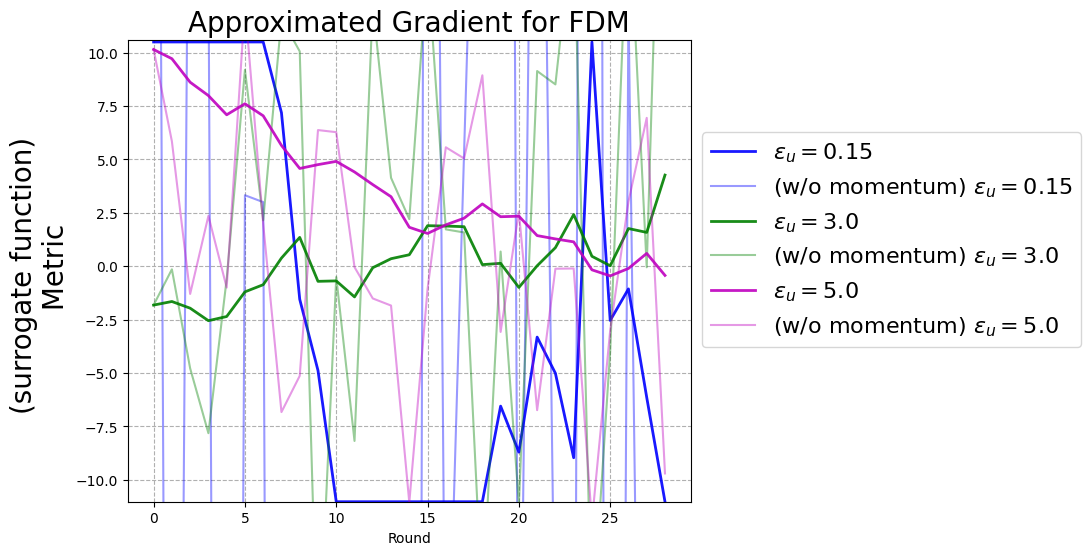

Skip: File already exists.
Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-heart_disease-PULDP-AVG-QCTrain-1.0.png


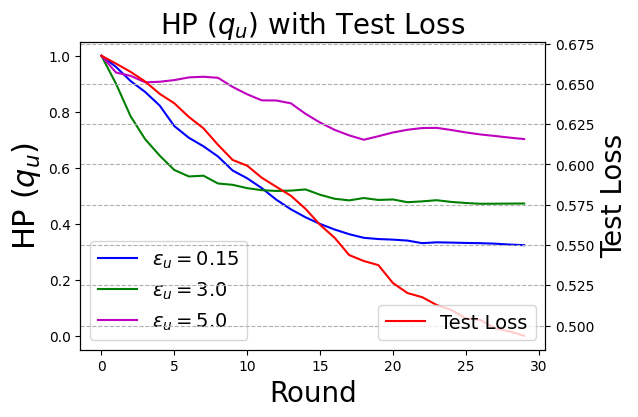

Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-losses-heart_disease-PULDP-AVG-QCTrain-1.0.png


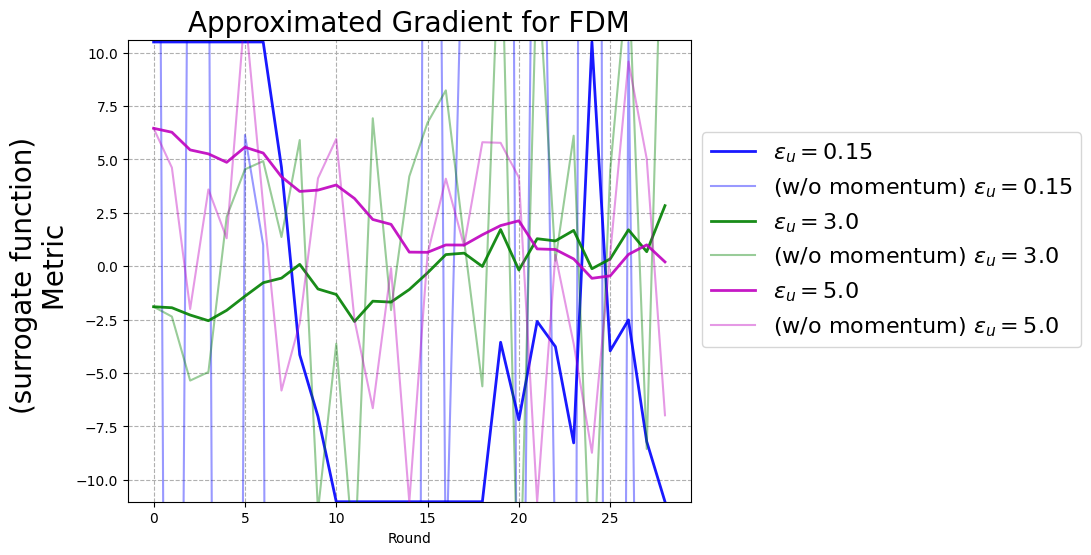

In [13]:
if "hd_all_acc_results" not in locals():
    hd_all_acc_results = {}
logger_set_warning()
fed_sim_params = init_heart_disease_param(parallelized=True)
fed_sim_params.epsilon_list = [0.15, 3.0, 5.0]
fed_sim_params.group_thresholds = [0.15, 3.0, 5.0]
fed_sim_params.ratio_list = [0.6, 0.25, 0.15]
fed_sim_params.validation_ratio = 0.5
fed_sim_params.times = 10
fed_sim_params.agg_strategy = "PULDP-AVG-QCTrain"

initial_q_u_list = [0.1, 0.5, 1.0]
for initial_q_u in initial_q_u_list:
    fed_sim_params.initial_q_u = initial_q_u
    run_online_optimization(fed_sim_params, force_update=False)
    x, acc_means, acc_stds = show_online_optimization_result(
        fed_sim_params, errorbar=False,
        img_name=f"{fed_sim_params.dataset_name}-{fed_sim_params.agg_strategy}-{initial_q_u}"
    )
    hd_all_acc_results[(fed_sim_params.agg_strategy, initial_q_u)] = (x, acc_means, acc_stds)

##### ablation study: weight decay

Skip: File already exists.
Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-heart_disease-PULDP-AVG-QCTrain-0.1-step_decay_off.png


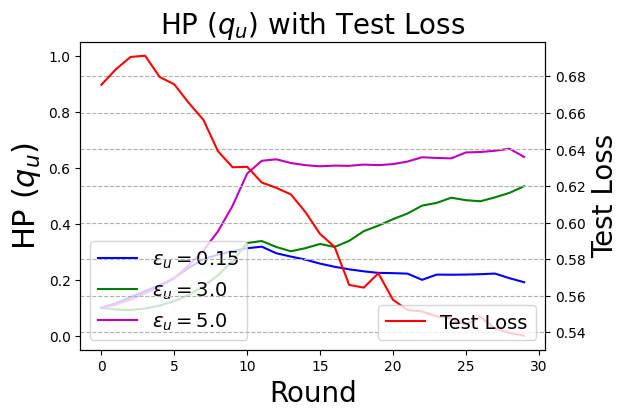

Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-losses-heart_disease-PULDP-AVG-QCTrain-0.1-step_decay_off.png


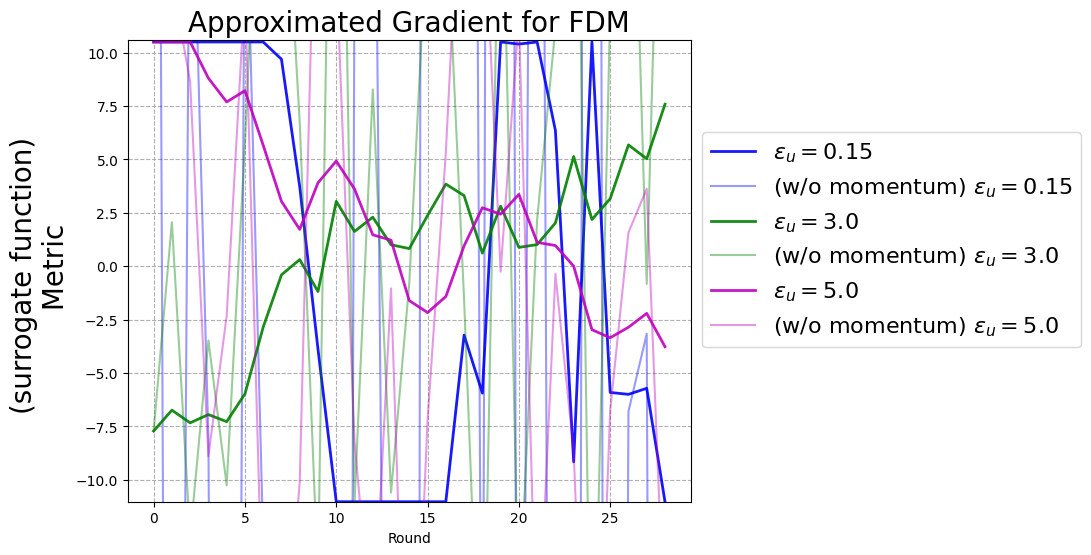

Skip: File already exists.
Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-heart_disease-PULDP-AVG-QCTrain-0.5-step_decay_off.png


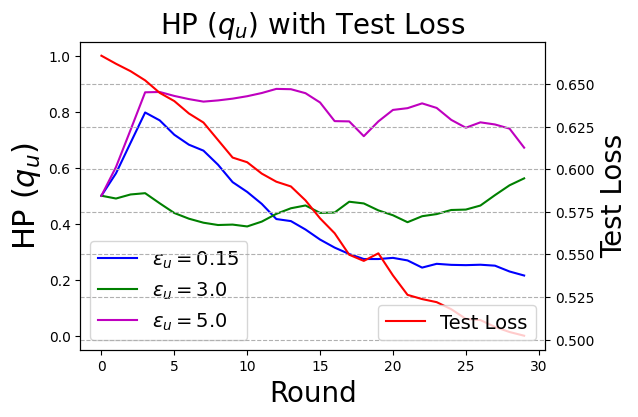

Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-losses-heart_disease-PULDP-AVG-QCTrain-0.5-step_decay_off.png


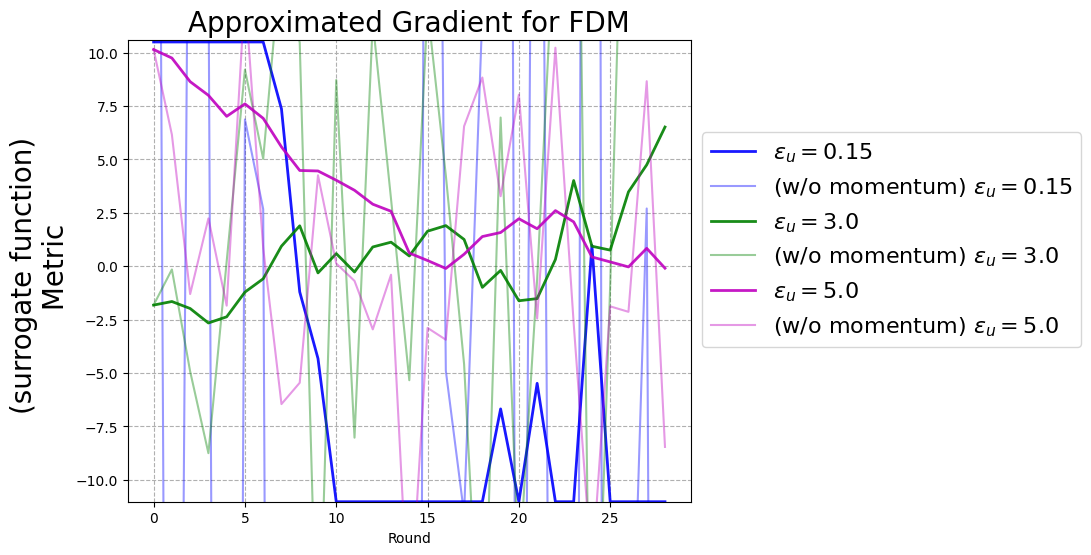

Skip: File already exists.
Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-heart_disease-PULDP-AVG-QCTrain-1.0-step_decay_off.png


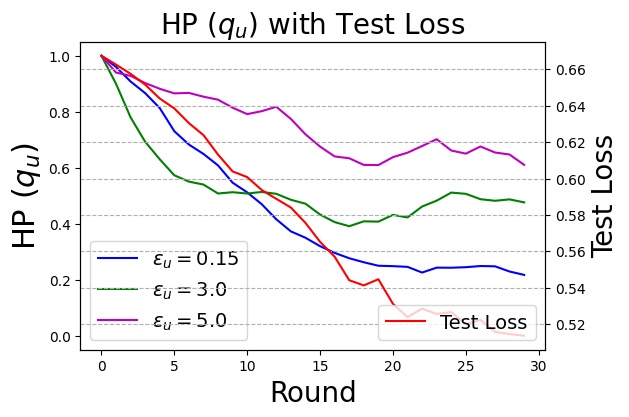

Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-losses-heart_disease-PULDP-AVG-QCTrain-1.0-step_decay_off.png


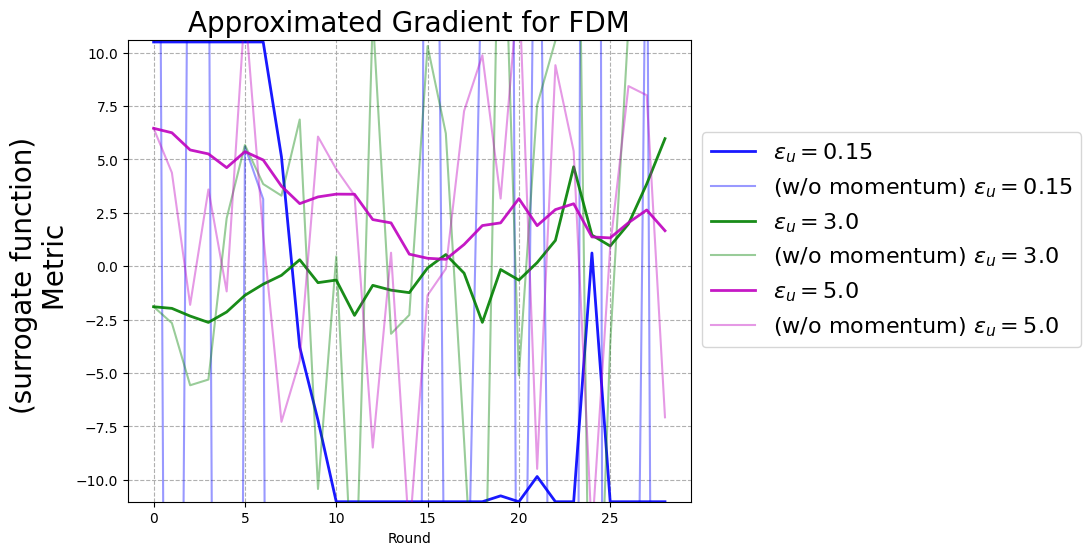

In [14]:
logger_set_warning()
fed_sim_params = init_heart_disease_param(parallelized=True)
fed_sim_params.epsilon_list = [0.15, 3.0, 5.0]
fed_sim_params.group_thresholds = [0.15, 3.0, 5.0]
fed_sim_params.ratio_list = [0.6, 0.25, 0.15]
fed_sim_params.validation_ratio = 0.5
fed_sim_params.times = 10
fed_sim_params.agg_strategy = "PULDP-AVG-QCTrain"
fed_sim_params.step_decay = False

initial_q_u_list = [0.1, 0.5, 1.0]
for initial_q_u in initial_q_u_list:
    fed_sim_params.initial_q_u = initial_q_u
    run_online_optimization(fed_sim_params, force_update=False)
    x, acc_means, acc_stds = show_online_optimization_result(
        fed_sim_params, errorbar=False,
        img_name=f"{fed_sim_params.dataset_name}-{fed_sim_params.agg_strategy}-{initial_q_u}-step_decay_off"
    )

##### ablation study: momentum

Skip: File already exists.
Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-heart_disease-PULDP-AVG-QCTrain-0.1-momentum_off.png


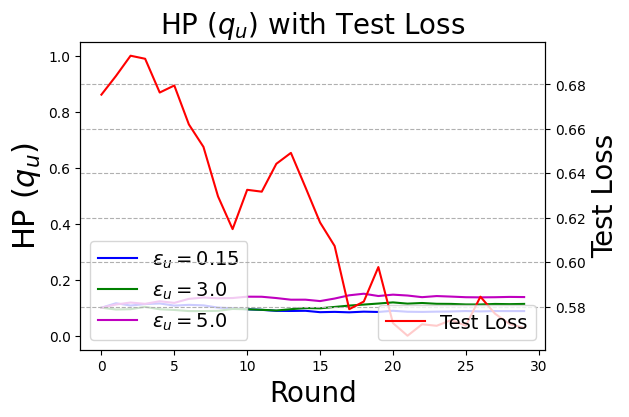

Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-losses-heart_disease-PULDP-AVG-QCTrain-0.1-momentum_off.png


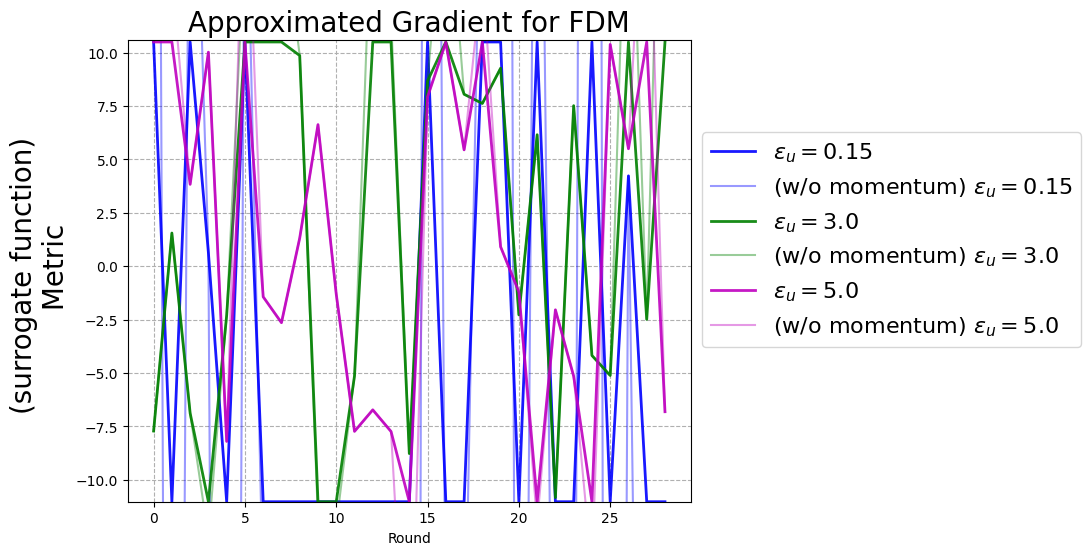

Skip: File already exists.
Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-heart_disease-PULDP-AVG-QCTrain-0.5-momentum_off.png


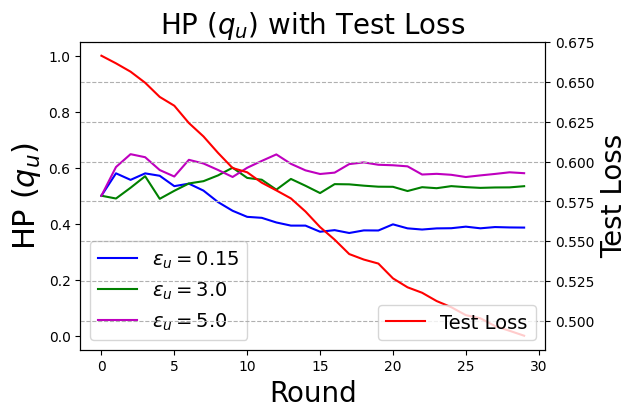

Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-losses-heart_disease-PULDP-AVG-QCTrain-0.5-momentum_off.png


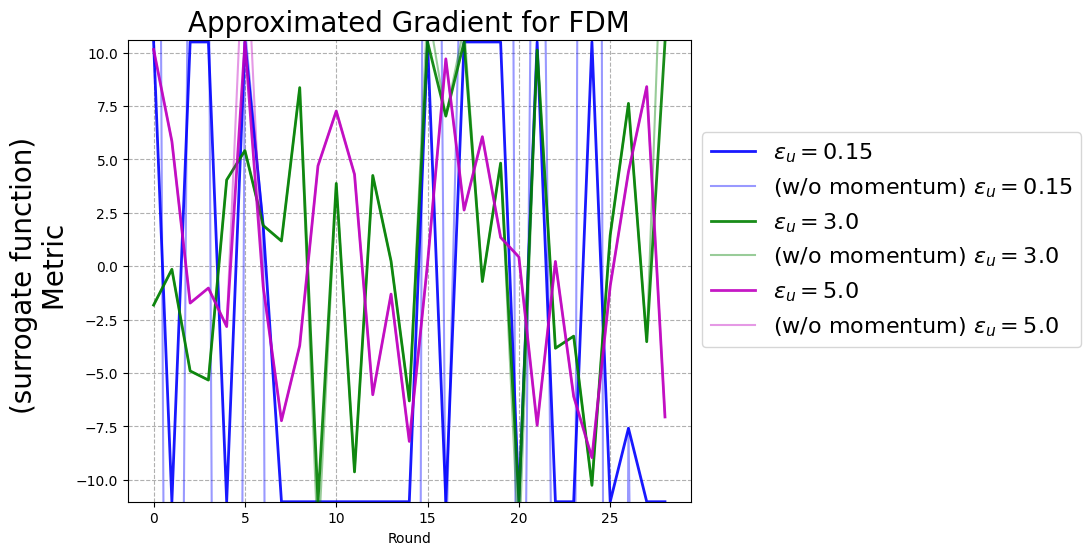

Skip: File already exists.
Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-heart_disease-PULDP-AVG-QCTrain-1.0-momentum_off.png


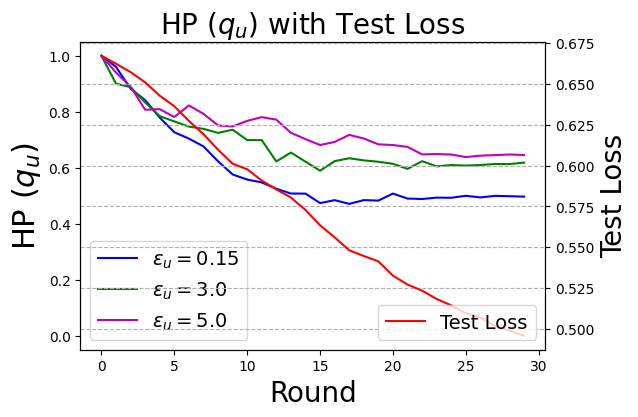

Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-losses-heart_disease-PULDP-AVG-QCTrain-1.0-momentum_off.png


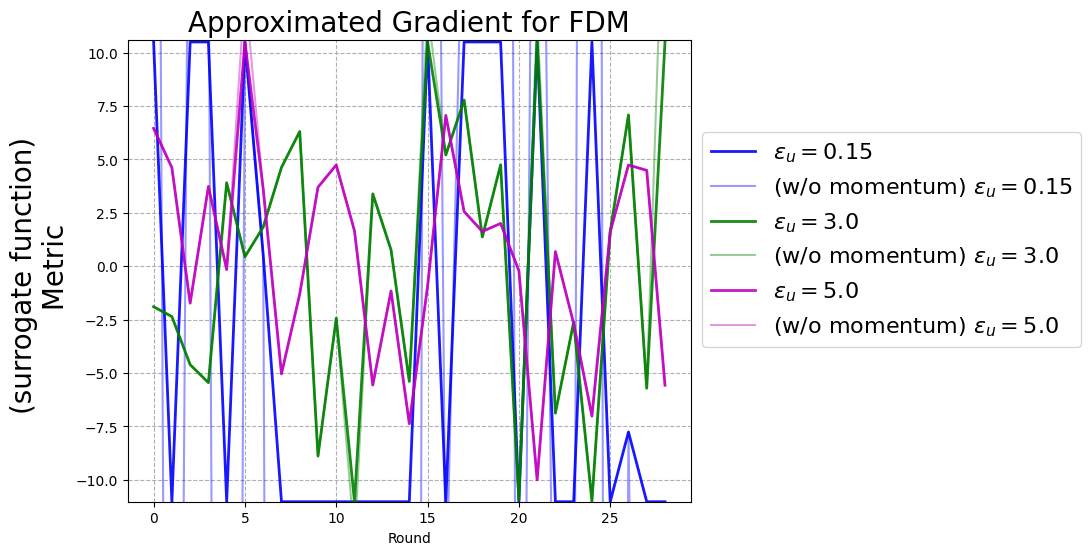

In [15]:
logger_set_warning()
fed_sim_params = init_heart_disease_param(parallelized=True)
fed_sim_params.epsilon_list = [0.15, 3.0, 5.0]
fed_sim_params.group_thresholds = [0.15, 3.0, 5.0]
fed_sim_params.ratio_list = [0.6, 0.25, 0.15]
fed_sim_params.validation_ratio = 0.5
fed_sim_params.times = 10
fed_sim_params.agg_strategy = "PULDP-AVG-QCTrain"
fed_sim_params.with_momentum = False

initial_q_u_list = [0.1, 0.5, 1.0]
for initial_q_u in initial_q_u_list:
    fed_sim_params.initial_q_u = initial_q_u
    run_online_optimization(fed_sim_params, force_update=False)
    x, acc_means, acc_stds = show_online_optimization_result(
        fed_sim_params, errorbar=False,
        img_name=f"{fed_sim_params.dataset_name}-{fed_sim_params.agg_strategy}-{initial_q_u}-momentum_off"
    )

#### Baselines

##### Best HP by static optimization (PULDP-AVG)
$(\epsilon_1, \epsilon_2, \epsilon_3) => (q_u=0.1, q_u=0.7, q_u=1.0)$

02/09/2024 22:31:22:WARNING:No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Skip: File already exists.
Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/specified_idx_result-heart_disease-PULDPAVG.png


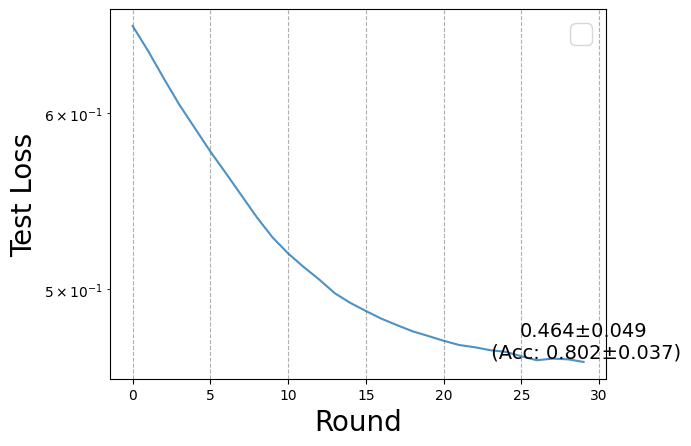

In [16]:
if "hd_all_acc_results" not in locals():
    hd_all_acc_results = {}
logger_set_warning()
fed_sim_params = init_heart_disease_param(parallelized=True)
fed_sim_params.epsilon_list = [0.15, 3.0, 5.0]
fed_sim_params.group_thresholds = [0.15, 3.0, 5.0]
fed_sim_params.ratio_list = [0.6, 0.25, 0.15]
fed_sim_params.validation_ratio = 0.5
fed_sim_params.times = 10
fed_sim_params.agg_strategy = "PULDP-AVG"
static_q_u_list = [1.0, 0.9, 0.8, 0.7, 0.5, 0.3, 0.1]
best_idx_per_group = {0.15: 6, 3.0: 3, 5.0: 0}

run_with_specified_idx(
    fed_sim_params, best_idx_per_group, 
    static_q_u_list=static_q_u_list, force_update=False
)
x, acc_means, acc_stds = show_specified_idx_result(
    fed_sim_params, best_idx_per_group, static_q_u_list=static_q_u_list, errorbar=False,
    img_name=f"{fed_sim_params.dataset_name}-PULDPAVG"
)
hd_all_acc_results[(fed_sim_params.agg_strategy, "PULDP-AVG (Offline HPO)")] = (x, acc_means, acc_stds)

##### random-updown

Skip: File already exists.
Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-heart_disease-0.1-random-updown.png


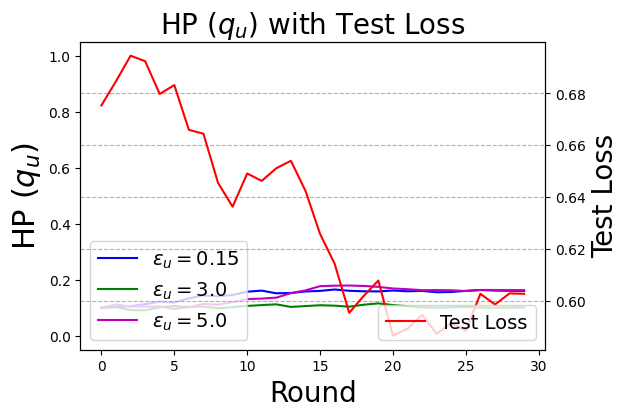

Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-losses-heart_disease-0.1-random-updown.png


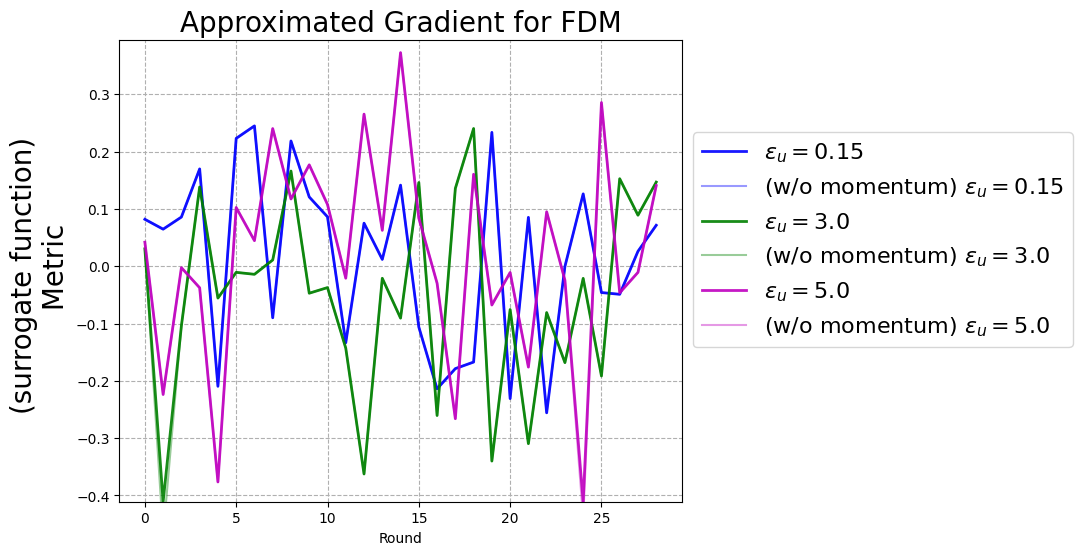

Skip: File already exists.
Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-heart_disease-0.5-random-updown.png


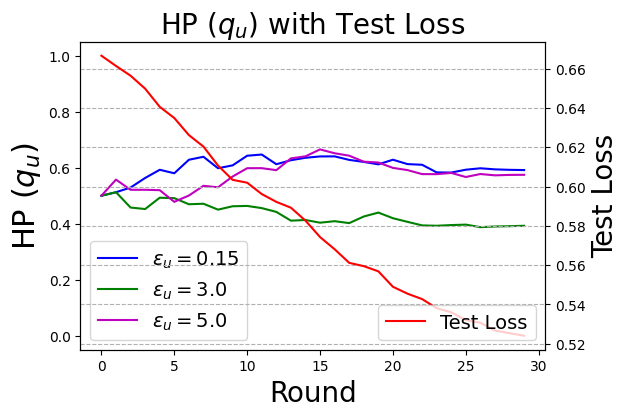

Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-losses-heart_disease-0.5-random-updown.png


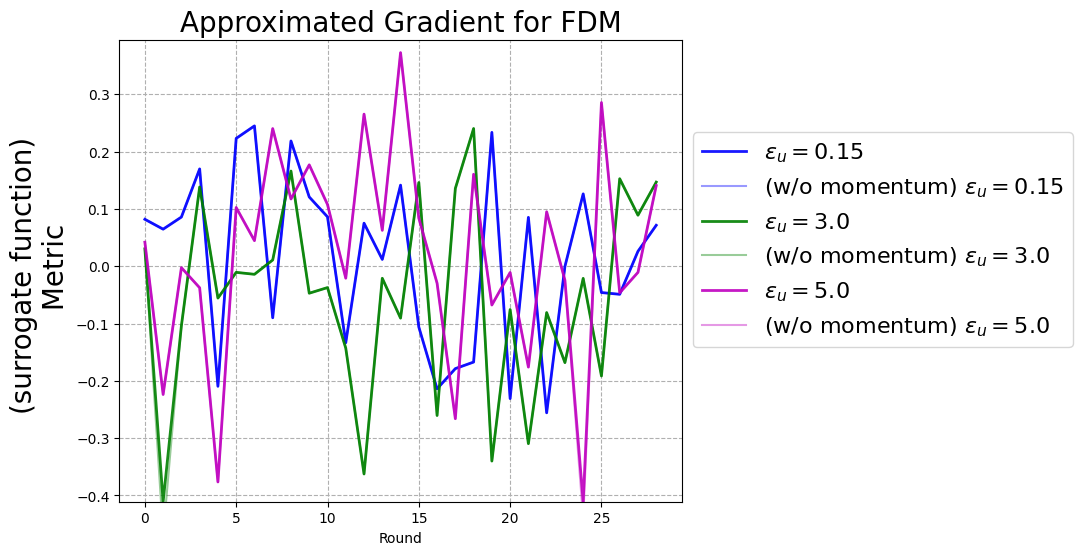

Skip: File already exists.
Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-heart_disease-1.0-random-updown.png


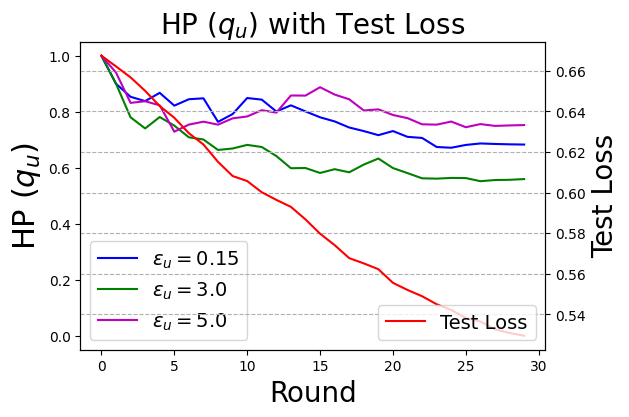

Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-losses-heart_disease-1.0-random-updown.png


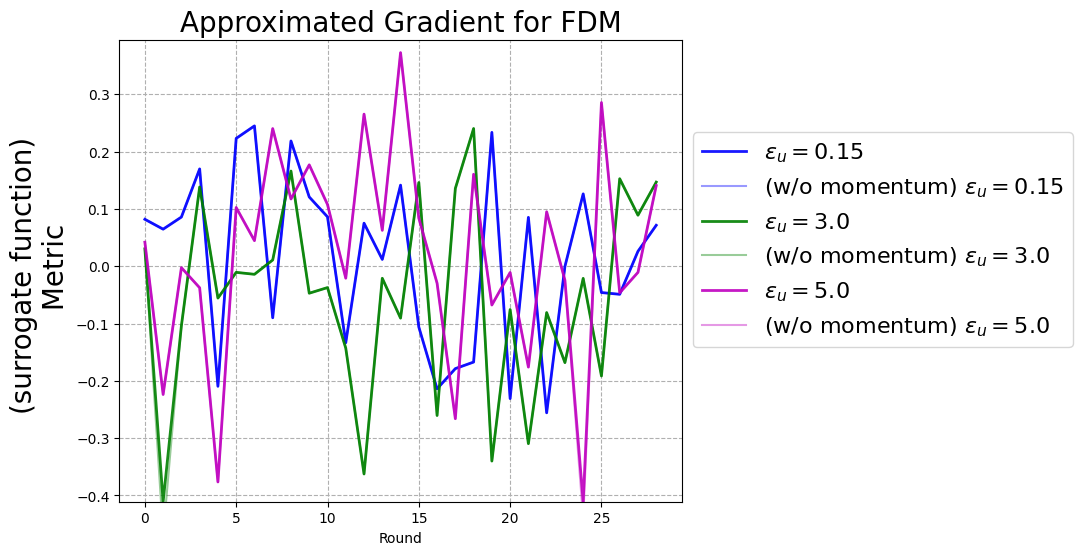

In [17]:
if "hd_all_acc_results" not in locals():
    hd_all_acc_results = {}

logger_set_warning()
fed_sim_params = init_heart_disease_param(parallelized=True)
fed_sim_params.epsilon_list = [0.15, 3.0, 5.0]
fed_sim_params.group_thresholds = [0.15, 3.0, 5.0]
fed_sim_params.ratio_list = [0.6, 0.25, 0.15]
fed_sim_params.validation_ratio = 0.5
fed_sim_params.times = 10
fed_sim_params.agg_strategy = "PULDP-AVG-QCTrain"
fed_sim_params.step_decay = True
fed_sim_params.hp_baseline = "random-updown"

initial_q_u_list = [0.1, 0.5, 1.0]
for initial_q_u in initial_q_u_list:
    fed_sim_params.initial_q_u = initial_q_u
    run_online_optimization(fed_sim_params, force_update=False)
    x, acc_means, acc_stds = show_online_optimization_result(
        fed_sim_params, errorbar=False,
        img_name=f"{fed_sim_params.dataset_name}-{initial_q_u}-{fed_sim_params.hp_baseline}"
    )
    hd_all_acc_results[(fed_sim_params.hp_baseline, initial_q_u)] = (x, acc_means, acc_stds)

##### Random

Skip: File already exists.
Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-heart_disease-0.1-random.png


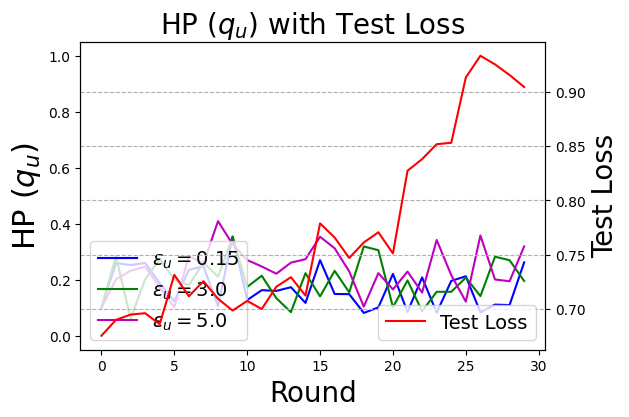

Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-losses-heart_disease-0.1-random.png


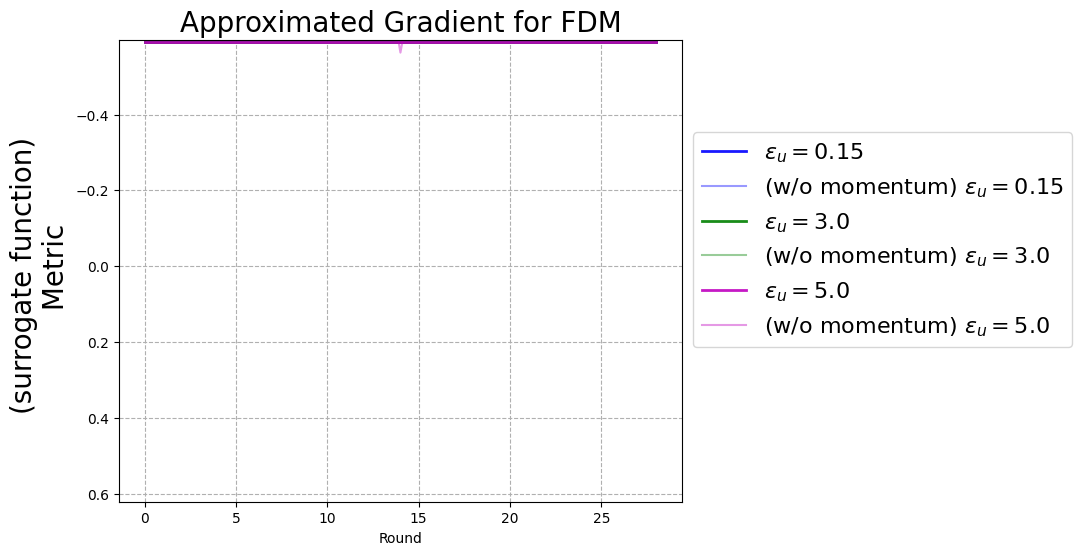

Skip: File already exists.
Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-heart_disease-0.5-random.png


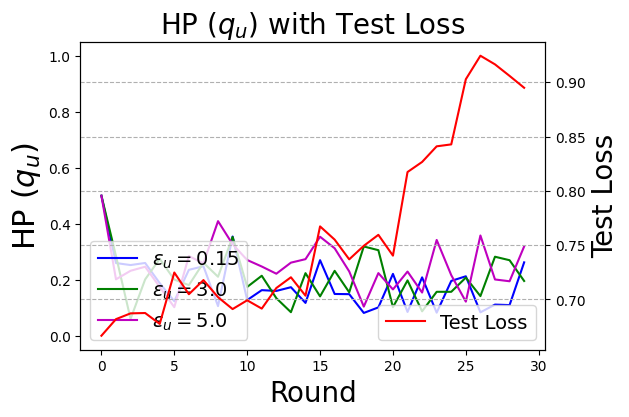

Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-losses-heart_disease-0.5-random.png


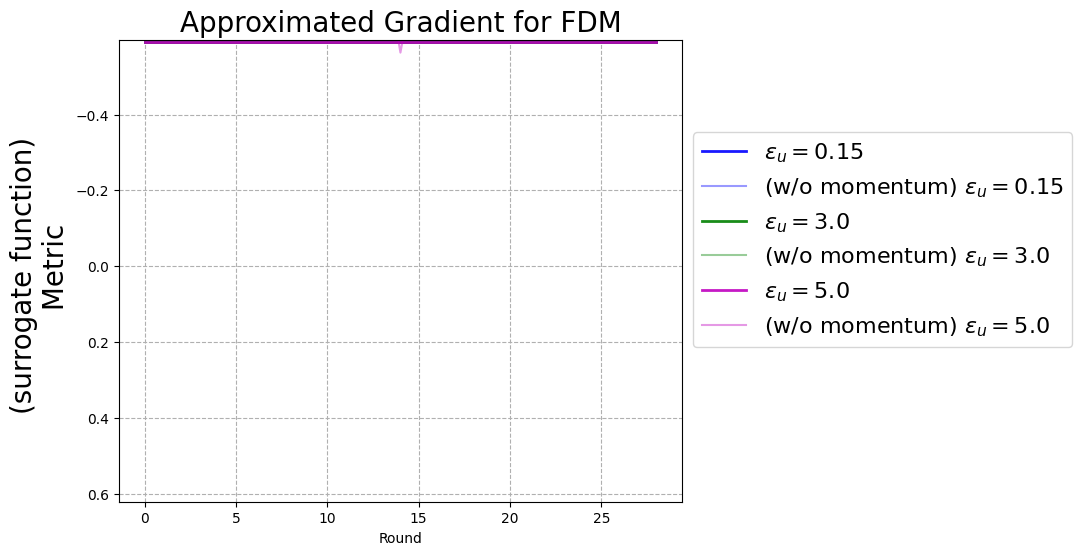

Skip: File already exists.
Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-heart_disease-1.0-random.png


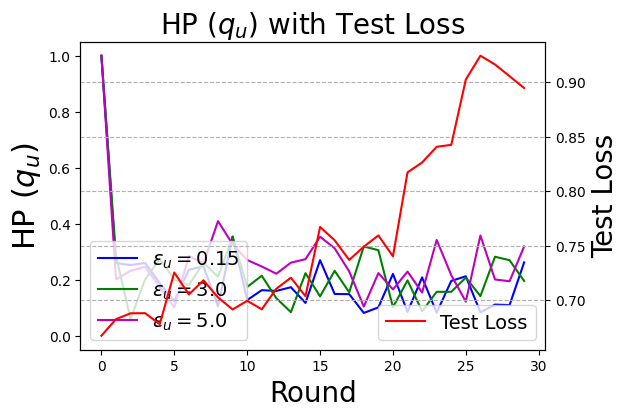

Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/online_optimization_result-losses-heart_disease-1.0-random.png


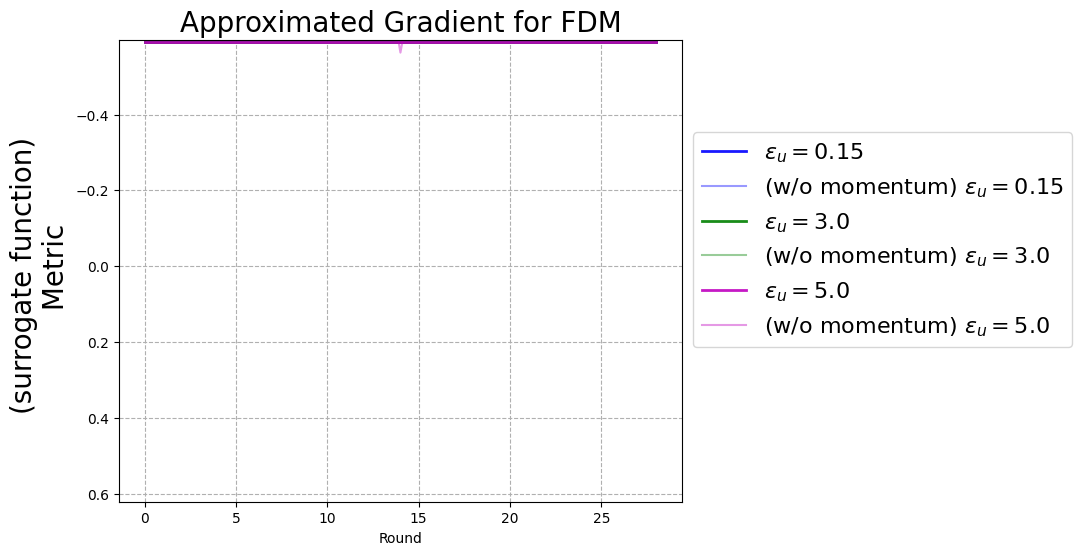

In [18]:
if "hd_all_acc_results" not in locals():
    hd_all_acc_results = {}

logger_set_warning()
fed_sim_params = init_heart_disease_param(parallelized=True)
fed_sim_params.epsilon_list = [0.15, 3.0, 5.0]
fed_sim_params.group_thresholds = [0.15, 3.0, 5.0]
fed_sim_params.ratio_list = [0.6, 0.25, 0.15]
fed_sim_params.validation_ratio = 0.5
fed_sim_params.times = 10
fed_sim_params.agg_strategy = "PULDP-AVG-QCTrain"
fed_sim_params.step_decay = True
fed_sim_params.hp_baseline = "random"

initial_q_u_list = [0.1, 0.5, 1.0]
for initial_q_u in initial_q_u_list:
    fed_sim_params.initial_q_u = initial_q_u
    run_online_optimization(fed_sim_params, force_update=False)
    x, acc_means, acc_stds = show_online_optimization_result(
        fed_sim_params, errorbar=False,
        img_name=f"{fed_sim_params.dataset_name}-{initial_q_u}-{fed_sim_params.hp_baseline}"
    )
    hd_all_acc_results[(fed_sim_params.hp_baseline, "Random")] = (x, acc_means, acc_stds)

##### ULDP-AVG

02/09/2024 22:31:42:WARNING:No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Skip: File already exists.
Result image saved to: /Users/fumiyuki/research/AcSilo/acsilo/exp/img/specified_idx_result-heart_disease-ULDPAVG.png


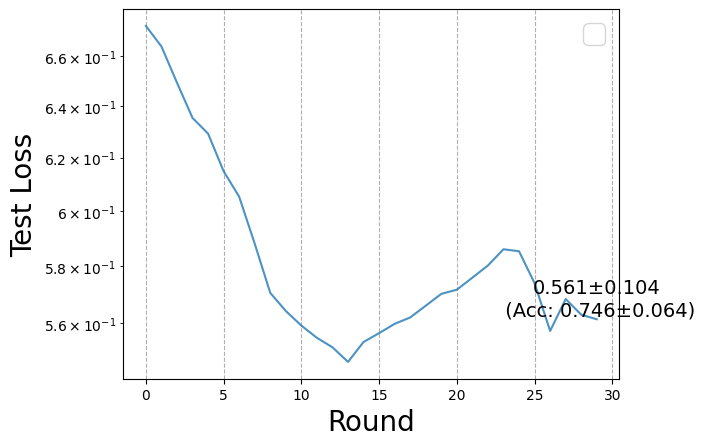

In [19]:
if "hd_all_acc_results" not in locals():
    hd_all_acc_results = {}
logger_set_warning()
fed_sim_params = init_heart_disease_param(parallelized=True)
fed_sim_params.epsilon_list = [0.15]
fed_sim_params.group_thresholds = [0.15]
fed_sim_params.ratio_list = [1.0]
fed_sim_params.validation_ratio = 0.5
fed_sim_params.times = 10
fed_sim_params.agg_strategy = "PULDP-AVG"
static_q_u_list = [1.0, 0.9, 0.8, 0.7, 0.5, 0.3, 0.1, 0.07, 0.05, 0.01]
best_idx_per_group = {0.15: 6}

run_with_specified_idx(
    fed_sim_params, best_idx_per_group, 
    static_q_u_list=static_q_u_list, force_update=False
)
x, acc_means, acc_stds = show_specified_idx_result(
    fed_sim_params, best_idx_per_group, static_q_u_list=static_q_u_list, errorbar=False,
    img_name=f"{fed_sim_params.dataset_name}-ULDPAVG"
)
hd_all_acc_results[(fed_sim_params.agg_strategy, "ULDP-AVG (Baseline)")] = (x, acc_means, acc_stds)

#### Compare all results

In [ ]:
plot_acc_results(fed_sim_params, hd_all_acc_results, initial_q_u_list=[0.1, 0.5, 1.0], errorbar=False)